# LENDING CASE STUDY

In [763]:
#import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [764]:
# read data and print head
lending_data = pd.read_csv('loan.csv', low_memory=False)
lending_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [765]:
#shape of data
lending_data.shape

(39717, 111)

In [766]:
#set option to see all columns
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

In [767]:
lending_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

## There are columns with all null values. Let's remove those columns to reduce number of columns

In [768]:
lending_data = lending_data.dropna(axis=1, how='all')
lending_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [769]:
# rechecking shape of data
lending_data.shape

(39717, 57)

# Lets find columns which has values that will not be useful and try and further reduce number of columns

In [770]:
lending_data.nunique().sort_values().head(40)

tax_liens                        1
delinq_amnt                      1
chargeoff_within_12_mths         1
acc_now_delinq                   1
application_type                 1
policy_code                      1
collections_12_mths_ex_med       1
pymnt_plan                       1
initial_list_status              1
term                             2
next_pymnt_d                     2
pub_rec_bankruptcies             3
loan_status                      3
verification_status              3
pub_rec                          5
home_ownership                   5
grade                            7
inq_last_6mths                   9
emp_length                      11
delinq_2yrs                     11
purpose                         14
sub_grade                       35
open_acc                        40
addr_state                      50
issue_d                         55
total_acc                       82
mths_since_last_delinq          95
last_pymnt_d                   101
last_credit_pull_d  

### We see below columns have only single values. Hence lets remove below columns as that does not help in any analysis

##### tax_liens                        
##### delinq_amnt                      
##### chargeoff_within_12_mths         
##### acc_now_delinq                   
##### application_type                 
##### policy_code                      
##### collections_12_mths_ex_med       
##### pymnt_plan                       
##### initial_list_status              

In [771]:
lending_data = lending_data.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'pymnt_plan', 'initial_list_status'], axis=1)

In [772]:
# rechecking shape of data
lending_data.shape

(39717, 48)

In [773]:
lending_data.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
url                         object
desc                        object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
mths_since_last_delinq     float64
mths_since_last_reco

In [774]:
lending_data.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  39717.000000    39717.000000            14035.000000   
mean       0.146512        0.869200               35.900962   
std        0.491812        1.070219               22.020060   
min        0.000000        0.000000                0.000000   
25%        0.000000        0.000000               18.000000   
50%        0.000000        1.000000               34.000000   
75%        0.000000        1.000000               52.000000   
max       11.000000        8.000000              120.000000   

       mths_since_last_record      open_acc       pub_rec      revol_bal  \
count             2786.000000  39717.000000  39717.000000   39717.000000   
mean                69.698134      9.294408      0.055065   13382.528086   
std                 43.822529      4.400282      0.237200   15885.016641   
min                  0.000000      2.000000      0.000000       0.000000   
25%                 22.000000      6.000000      0.000000    3703.000000   
50%                 90.000000      9.000000      0.000000    8850.000000   
75%                104.000000     12.000000      0.000000   17058.000000   
max                129.000000     44.000000      4.000000  149588.000000   

          total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count  39717.000000  39717.000000   39717.000000  39717.000000   
mean      22.088828     51.227887      50.989768  12153.596544   
std       11.401709    375.172839     373.824457   9042.040766   
min        2.000000      0.000000       0.000000      0.000000   
25%       13.000000      0.000000       0.000000   5576.930000   
50%       20.000000      0.000000       0.000000   9899.640319   
75%       29.000000      0.000000       0.000000  16534.433040   
max       90.000000   6311.470000    6307.370000  58563.679930   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count     39717.000000     39717.000000   39717.000000        39717.000000   
mean      11567.149118      9793.348813    2263.663172            1.363015   
std        8942.672613      7065.522127    2608.111964            7.289979   
min           0.000000         0.000000       0.000000            0.000000   
25%        5112.310000      4600.000000     662.180000            0.000000   
50%        9287.150000      8000.000000    1348.910000            0.000000   
75%       15798.810000     13653.260000    2833.400000            0.000000   
max       58563.680000     35000.020000   23563.680000          180.200000   

         recoveries  collection_recovery_fee  last_pymnt_amnt  \
count  39717.000000             39717.000000     39717.000000   
mean      95.221624                12.406112      2678.826162   
std      688.744771               148.671593      4447.136012   
min    

In [775]:
lending_data.nunique().sort_values(ascending=False).head(15)

id                 39717
url                39717
member_id          39717
total_pymnt        37850
total_pymnt_inv    37518
total_rec_int      35148
last_pymnt_amnt    34930
emp_title          28820
desc               26526
revol_bal          21711
title              19615
installment        15383
funded_amnt_inv     8205
total_rec_prncp     7976
annual_inc          5318
dtype: int64

### Here we see that id, member_id and url has unique values for each column. We will keep id column and remove other 2 columns

In [776]:
lending_data.drop(['member_id', 'url'], axis=1, inplace=True)

## Few other columns which will not add value in analysis are:
### emp_title, title


In [777]:
lending_data.drop(['emp_title', 'title'], axis=1, inplace=True)

## There are many other columns which does not add any value.

##### 'total_rec_int', 'last_pymnt_amnt', 'revol_bal', 'recoveries', 'delinq_2yrs', 'collection_recovery_fee', 'next_pymnt_d', 'last_pymnt_d', 'last_pymnt_amnt', 'total_rec_late_fee', 'total_rec_prncp', 'out_prncp', 'total_pymnt', 'mths_since_last_delinq', 'mths_since_last_record'

In [778]:
lending_data.drop(['total_rec_int', 'last_pymnt_amnt', 'revol_bal', 'recoveries', 'delinq_2yrs', 'collection_recovery_fee', 'next_pymnt_d', 'last_pymnt_d', 'last_pymnt_amnt', 'total_rec_late_fee', 'total_rec_prncp', 'out_prncp', 'total_pymnt', 'mths_since_last_delinq', 'mths_since_last_record'], axis=1, inplace=True)

In [779]:
lending_data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'desc',
       'purpose', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'out_prncp_inv', 'total_pymnt_inv', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [780]:
lending_data.shape

(39717, 30)

## Handle Missing / Null values

In [781]:
lending_data.isnull().sum(axis = 0).sort_values(ascending=False)

desc                    12942
emp_length               1075
pub_rec_bankruptcies      697
revol_util                 50
last_credit_pull_d          2
funded_amnt_inv             0
zip_code                    0
total_pymnt_inv             0
out_prncp_inv               0
total_acc                   0
pub_rec                     0
open_acc                    0
inq_last_6mths              0
earliest_cr_line            0
dti                         0
addr_state                  0
purpose                     0
term                        0
loan_amnt                   0
loan_status                 0
issue_d                     0
verification_status         0
annual_inc                  0
home_ownership              0
funded_amnt                 0
sub_grade                   0
grade                       0
installment                 0
int_rate                    0
id                          0
dtype: int64

#### `desc` columns is of no use as it stores value of Loan description provided by the borrower

In [782]:
lending_data.drop(['desc'], axis=1, inplace=True)

#### `last_credit_pull_d` is also not useful column which was missed to be removed, lets remove this column

In [783]:
lending_data.drop(['last_credit_pull_d'], axis=1, inplace=True)

#### `pub_rec_bankruptcies` column let us find value counts and find a way to populate remaining empty data

In [784]:
lending_data.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [785]:
lending_data.pub_rec_bankruptcies.mode()

0    0.0
Name: pub_rec_bankruptcies, dtype: float64

#### Out of 39717 accounts only 37339 account has value 0.0, seeing this we can easily add value 0.0 to all missing values for `pub_rec_bankruptcies` columns

In [786]:
lending_data.pub_rec_bankruptcies.fillna(lending_data.pub_rec_bankruptcies.mode()[0], inplace = True)

In [787]:
lending_data[lending_data.pub_rec_bankruptcies.isnull()].pub_rec_bankruptcies

Series([], Name: pub_rec_bankruptcies, dtype: float64)

In [788]:
lending_data.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    38036
1.0     1674
2.0        7
Name: count, dtype: int64

#### Lets analyze and fill `emp_length` column

In [789]:
lending_data.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [790]:
lending_data.emp_length.mode()

0    10+ years
Name: emp_length, dtype: object

#### Since maximum occurences is of 10+ years and we can safely add same value for remaning null values

In [791]:
lending_data.emp_length.fillna(lending_data.emp_length.mode()[0], inplace = True)

In [792]:
lending_data.emp_length.isna().sum()

0

#### Very small percentage of revol_util is null hence let us drop rows with null values

In [793]:
lending_data.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
lending_data.revol_util.isna().sum()

0

## Standardize data

In [794]:
# Lets check data types of each column
lending_data.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_util               object
total_acc                 int64
out_prncp_inv           float64
total_pymnt_inv         float64
pub_rec_bankruptcies    float64
dtype: object

In [795]:
lending_data.term.value_counts()

term
36 months    29049
60 months    10618
Name: count, dtype: int64

In [796]:
lending_data.int_rate.value_counts()

int_rate
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
16.33%      1
16.15%      1
16.01%      1
10.64%      1
17.44%      1
Name: count, Length: 371, dtype: int64

### Remove % symbol from int_rate and make it a float

In [797]:
lending_data['int_rate'] = lending_data.int_rate.str.strip('%').astype(float)

In [798]:
lending_data.int_rate.dtype

dtype('float64')

In [799]:
lending_data.issue_d.value_counts()

issue_d
Dec-11    2260
Nov-11    2221
Oct-11    2113
Sep-11    2063
Aug-11    1928
Jul-11    1867
Jun-11    1826
May-11    1689
Apr-11    1562
Mar-11    1441
Jan-11    1380
Feb-11    1297
Dec-10    1266
Oct-10    1128
Nov-10    1121
Jul-10    1118
Sep-10    1085
Aug-10    1075
Jun-10    1024
May-10     920
Apr-10     827
Mar-10     736
Feb-10     626
Nov-09     601
Dec-09     596
Jan-10     587
Oct-09     544
Sep-09     449
Aug-09     408
Jul-09     373
Jun-09     354
May-09     319
Apr-09     288
Mar-09     275
Feb-09     259
Jan-09     236
Mar-08     232
Dec-08     222
Nov-08     183
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      82
May-08      71
Aug-08      70
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: count, dtype: int64

In [800]:
lending_data.earliest_cr_line.value_counts()

earliest_cr_line
Nov-98    370
Oct-99    366
Dec-98    348
Oct-00    345
Dec-97    328
         ... 
Feb-66      1
Dec-61      1
Oct-54      1
Jun-72      1
Oct-74      1
Name: count, Length: 526, dtype: int64

In [801]:
lending_data.revol_util

0        83.70%
1         9.40%
2        98.50%
3           21%
4        53.90%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 39667, dtype: object

### Remove % symbol from revol_util and make it a float

In [802]:
lending_data['revol_util'] = lending_data.revol_util.str.strip('%').astype(float)

In [803]:
lending_data.term.value_counts()

term
36 months    29049
60 months    10618
Name: count, dtype: int64

In [804]:
#removing leading space from term field
lending_data['term'] = lending_data.term.str.strip()

#### Note: We kept issue_d and earliest_cr_line as it is because we will use it to derive columns for analysis

# Outlier Analysis

In [805]:
lending_data.home_ownership.value_counts()

home_ownership
RENT        18867
MORTGAGE    17648
OWN          3053
OTHER          96
NONE            3
Name: count, dtype: int64

**Observations**: From above count we can conclude that most borrowers either stay in rented house or have a mortgage.
Only few own their house. 
There are only 3 NONE values which can be replace with OTHER

In [806]:
# replace NONE value with OTHER
lending_data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [807]:
lending_data.home_ownership.value_counts()

home_ownership
RENT        18867
MORTGAGE    17648
OWN          3053
OTHER          99
Name: count, dtype: int64

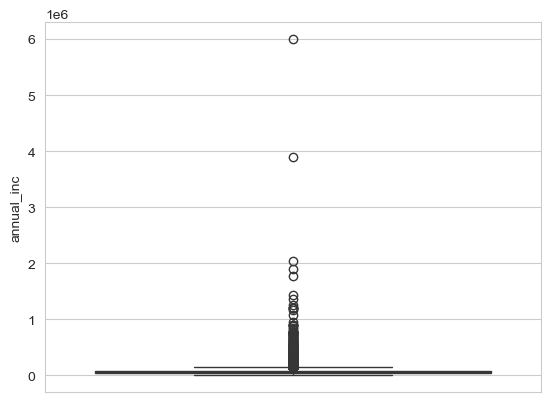

In [808]:
sns.boxplot(lending_data['annual_inc'])
plt.show()

**Obersevation** 
We see lot of outlier data for annual income which needs cleanup, let us check percentile values and accordingly work on removing outlier data

In [809]:
annual_income_quantiles = lending_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
annual_income_quantiles

0.50     59000.00
0.75     82400.00
0.90    116000.00
0.95    142000.00
0.97    165996.00
0.98    187000.00
0.99    234997.36
Name: annual_inc, dtype: float64

**Observation**:
Value after 95 quantile are too high from average. Hence we will remove this data from out data set

In [810]:
per_95_annual_inc = lending_data['annual_inc'].quantile(0.95)
lending_data = lending_data[lending_data.annual_inc <= per_95_annual_inc]

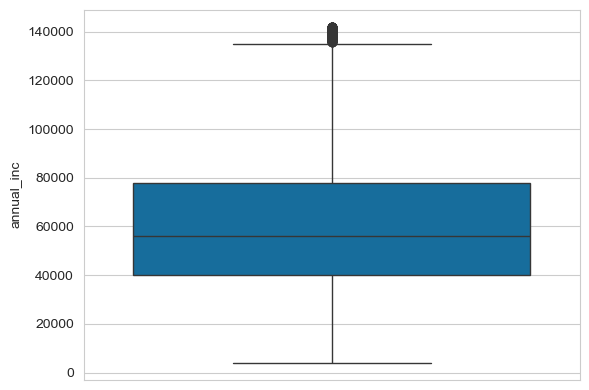

In [811]:
sns.boxplot(lending_data['annual_inc'])
plt.show()

In [812]:
lending_data.shape

(37695, 28)

## Dervied columns

##### Let is split column issue_d and earliest_cr_line into 4 columns issue_d_month, issue_d_year, earliest_cr_line_month, earliest_cr_line_year

In [813]:
issue_d_month_year = lending_data.issue_d.str.partition("-", True)    
lending_data['issue_d_month'] = issue_d_month_year[0]
lending_data['issue_d_year'] = issue_d_month_year[2]

In [814]:
lending_data.head()

id  loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  \
0  1077501       5000         5000           4975.0  36 months     10.65   
1  1077430       2500         2500           2500.0  60 months     15.27   
2  1077175       2400         2400           2400.0  36 months     15.96   
3  1076863      10000        10000          10000.0  36 months     13.49   
4  1075358       3000         3000           3000.0  60 months     12.69   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT     24000.0   
1        59.83     C        C4   < 1 year           RENT     30000.0   
2        84.33     C        C5  10+ years           RENT     12252.0   
3       339.31     C        C1  10+ years           RENT     49200.0   
4        67.79     B        B5     1 year           RENT     80000.0   

  verification_status issue_d  loan_status         purpose zip_code  \
0            Verified  Dec-11   Fully Paid     credit_card    860xx   
1     Source Verified  Dec-11  Charged Off             car    309xx   
2        Not Verified  Dec-11   Fully Paid  small_business    606xx   
3     Source Verified  Dec-11   Fully Paid           other    917xx   
4     Source Verified  Dec-11      Current           other    972xx   

  addr_state    dti earliest_cr_line  inq_last_6mths  open_acc  pub_rec  \
0         AZ  27.65           Jan-85               1         3        0   
1         GA   1.00           Apr-99               5         3        0   
2         IL   8.72           Nov-01               2         2        0   
3         CA  20.00           Feb-96               1        10        0   
4         OR  17.94           Jan-96               0        15        0   

   revol_util  total_acc  out_prncp_inv  total_pymnt_inv  \
0        83.7          9           0.00          5833.84   
1         9.4          4           0.00          1008.71   
2        98.5         10           0.00          3005.67   
3        21.0         37           0.00         12231.89   
4        53.9         38         524.06          3513.33   

   pub_rec_bankruptcies issue_d_month issue_d_year  
0                   0.0           Dec           11  
1                   0.0           Dec           11  
2                   0.0           Dec           11  
3                   0.0           Dec           11  
4                   0.0           Dec           11

In [815]:
earliest_cr_line_month_year = lending_data.earliest_cr_line.str.partition("-", True)    
lending_data['earliest_cr_line_month'] = earliest_cr_line_month_year[0]
lending_data['earliest_cr_line_year'] = earliest_cr_line_month_year[2]

In [816]:
lending_data.head()

id  loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  \
0  1077501       5000         5000           4975.0  36 months     10.65   
1  1077430       2500         2500           2500.0  60 months     15.27   
2  1077175       2400         2400           2400.0  36 months     15.96   
3  1076863      10000        10000          10000.0  36 months     13.49   
4  1075358       3000         3000           3000.0  60 months     12.69   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT     24000.0   
1        59.83     C        C4   < 1 year           RENT     30000.0   
2        84.33     C        C5  10+ years           RENT     12252.0   
3       339.31     C        C1  10+ years           RENT     49200.0   
4        67.79     B        B5     1 year           RENT     80000.0   

  verification_status issue_d  loan_status         purpose zip_code  \
0            Verified  Dec-11   Fully Paid     credit_card    860xx   
1     Source Verified  Dec-11  Charged Off             car    309xx   
2        Not Verified  Dec-11   Fully Paid  small_business    606xx   
3     Source Verified  Dec-11   Fully Paid           other    917xx   
4     Source Verified  Dec-11      Current           other    972xx   

  addr_state    dti earliest_cr_line  inq_last_6mths  open_acc  pub_rec  \
0         AZ  27.65           Jan-85               1         3        0   
1         GA   1.00           Apr-99               5         3        0   
2         IL   8.72           Nov-01               2         2        0   
3         CA  20.00           Feb-96               1        10        0   
4         OR  17.94           Jan-96               0        15        0   

   revol_util  total_acc  out_prncp_inv  total_pymnt_inv  \
0        83.7          9           0.00          5833.84   
1         9.4          4           0.00          1008.71   
2        98.5         10           0.00          3005.67   
3        21.0         37           0.00         12231.89   
4        53.9         38         524.06          3513.33   

   pub_rec_bankruptcies issue_d_month issue_d_year earliest_cr_line_month  \
0                   0.0           Dec           11                    Jan   
1                   0.0           Dec           11                    Apr   
2                   0.0           Dec           11                    Nov   
3                   0.0           Dec           11                    Feb   
4                   0.0           Dec           11                    Jan   

  earliest_cr_line_year  
0                    85  
1                    99  
2                    01  
3                    96  
4                    96

In [817]:
lending_data.describe()

id     loan_amnt   funded_amnt  funded_amnt_inv  \
count  3.769500e+04  37695.000000  37695.000000     37695.000000   
mean   6.828679e+05  10855.284520  10600.927179     10069.888967   
std    2.106080e+05   7156.225338   6897.988878      6836.176951   
min    5.473400e+04    500.000000    500.000000         0.000000   
25%    5.163255e+05   5100.000000   5000.000000      5000.000000   
50%    6.646180e+05   9600.000000   9250.000000      8500.000000   
75%    8.370680e+05  15000.000000  14600.000000     13975.000000   
max    1.077501e+06  35000.000000  35000.000000     35000.000000   

           int_rate   installment     annual_inc           dti  \
count  37695.000000  37695.000000   37695.000000  37695.000000   
mean      11.967401    314.115886   61105.942262     13.493783   
std        3.696596    199.554533   27822.172168      6.666993   
min        5.420000     15.690000    4000.000000      0.000000   
25%        8.940000    164.010000   40000.000000      8.400000   
50%       11.830000    273.410000   56004.000000     13.630000   
75%       14.460000    412.680000   78000.000000     18.770000   
max       24.400000   1305.190000  142000.000000     29.990000   

       inq_last_6mths      open_acc       pub_rec    revol_util     total_acc  \
count    37695.000000  37695.000000  37695.000000  37695.000000  37695.000000   
mean         0.862157      9.191139      0.056427     48.775936     21.693514   
std          1.063683      4.348857      0.239547     28.258792     11.206837   
min          0.000000      2.000000      0.000000      0.000000      2.000000   
25%          0.000000      6.000000      0.000000     25.500000     13.000000   
50%          1.000000      8.000000      0.000000     49.200000     20.000000   
75%          1.000000     12.000000      0.000000     72.200000     28.000000   
max          8.000000     44.000000      4.000000     99.900000     90.000000   

       out_prncp_inv  total_pymnt_inv  pub_rec_bankruptcies  
count   37695.000000     37695.000000          37695.000000  
mean       48.201147     11160.360614              0.043666  
std       357.812000      8538.304860              0.205132  
min         0.000000         0.000000              0.000000  
25%         0.000000      5007.970000              0.000000  
50%         0.000000      9004.450000              0.000000  
75%         0.000000     15222.540000              0.000000  
max      6307.370000     58563.680000              2.000000

In [818]:
# grouping data in bins for better understanding
lending_data['int_rate_groups'] = pd.cut(lending_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
lending_data['open_acc_groups'] = pd.cut(lending_data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
lending_data['revol_util_groups'] = pd.cut(lending_data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
lending_data['total_acc_groups'] = pd.cut(lending_data['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
lending_data['annual_inc_groups'] = pd.cut(lending_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [819]:
lending_data.head()

id  loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  \
0  1077501       5000         5000           4975.0  36 months     10.65   
1  1077430       2500         2500           2500.0  60 months     15.27   
2  1077175       2400         2400           2400.0  36 months     15.96   
3  1076863      10000        10000          10000.0  36 months     13.49   
4  1075358       3000         3000           3000.0  60 months     12.69   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT     24000.0   
1        59.83     C        C4   < 1 year           RENT     30000.0   
2        84.33     C        C5  10+ years           RENT     12252.0   
3       339.31     C        C1  10+ years           RENT     49200.0   
4        67.79     B        B5     1 year           RENT     80000.0   

  verification_status issue_d  loan_status         purpose zip_code  \
0            Verified  Dec-11   Fully Paid     credit_card    860xx   
1     Source Verified  Dec-11  Charged Off             car    309xx   
2        Not Verified  Dec-11   Fully Paid  small_business    606xx   
3     Source Verified  Dec-11   Fully Paid           other    917xx   
4     Source Verified  Dec-11      Current           other    972xx   

  addr_state    dti earliest_cr_line  inq_last_6mths  open_acc  pub_rec  \
0         AZ  27.65           Jan-85               1         3        0   
1         GA   1.00           Apr-99               5         3        0   
2         IL   8.72           Nov-01               2         2        0   
3         CA  20.00           Feb-96               1        10        0   
4         OR  17.94           Jan-96               0        15        0   

   revol_util  total_acc  out_prncp_inv  total_pymnt_inv  \
0        83.7          9           0.00          5833.84   
1         9.4          4           0.00          1008.71   
2        98.5         10           0.00          3005.67   
3        21.0         37           0.00         12231.89   
4        53.9         38         524.06          3513.33   

   pub_rec_bankruptcies issue_d_month issue_d_year earliest_cr_line_month  \
0                   0.0           Dec           11                    Jan   
1                   0.0           Dec           11                    Apr   
2                   0.0           Dec           11                    Nov   
3                   0.0           Dec           11                    Feb   
4                   0.0           Dec           11                    Jan   

  earliest_cr_line_year int_rate_groups open_acc_groups revol_util_groups  \
0                    85          9%-13%            2-10            80-100   
1                    99         13%-17%            2-10              0-20   
2                    01         13%-17%            2-10            80-100   
3                    96         13%-17%            2-10             20-40   
4                    96          9%-13%           10-19             40-60   

  total_acc_groups annual_inc_groups  
0             2-20            3k-31k  
1             2-20            3k-31k  
2             2-20            3k-31k  
3            20-37           31k-58k  
4            37-55           58k-85k

# Univariant Analysis

#### LOAN_STATUS being most important variable let us begin with validating values of same

In [820]:
lending_data['loan_status'].value_counts()

loan_status
Fully Paid     31236
Charged Off     5405
Current         1054
Name: count, dtype: int64

### We see `loan_status` have 3 values. However we only need data of `Fully Paid` and `Charged Off` for our analysis 
##### We will remove `Current` loan_status data

In [821]:
lending_data = lending_data[lending_data.loan_status != 'Current']
lending_data.loan_status.value_counts()

loan_status
Fully Paid     31236
Charged Off     5405
Name: count, dtype: int64

In [822]:
lending_data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'out_prncp_inv', 'total_pymnt_inv', 'pub_rec_bankruptcies',
       'issue_d_month', 'issue_d_year', 'earliest_cr_line_month',
       'earliest_cr_line_year', 'int_rate_groups', 'open_acc_groups',
       'revol_util_groups', 'total_acc_groups', 'annual_inc_groups'],
      dtype='object')

In [823]:
import warnings
warnings.filterwarnings("ignore")

## Loan Amount

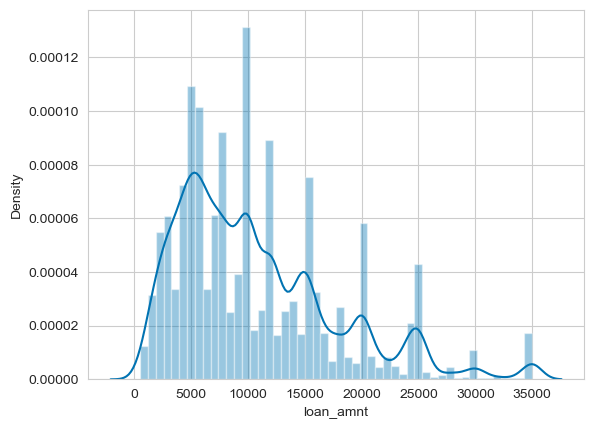

In [828]:
sns.distplot(a=lending_data.loan_amnt)
plt.show()

<Axes: ylabel='loan_amnt'>

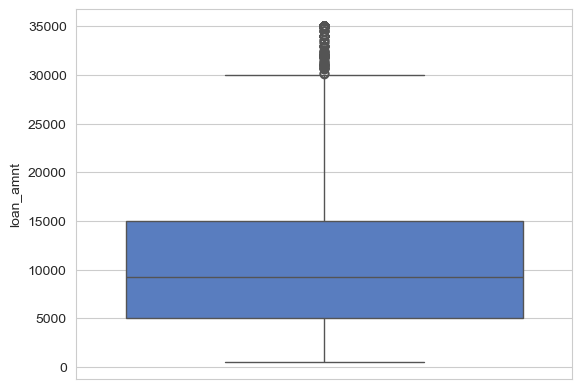

In [829]:
sns.boxplot(data=lending_data.loan_amnt, palette='muted')

In [830]:
lending_data.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25495.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

**Observations**:
From above plots, we understand that maximum loans were in the range from 5k - 15k. Very few loans were taken for amount 30k and above.

## Funded Amount

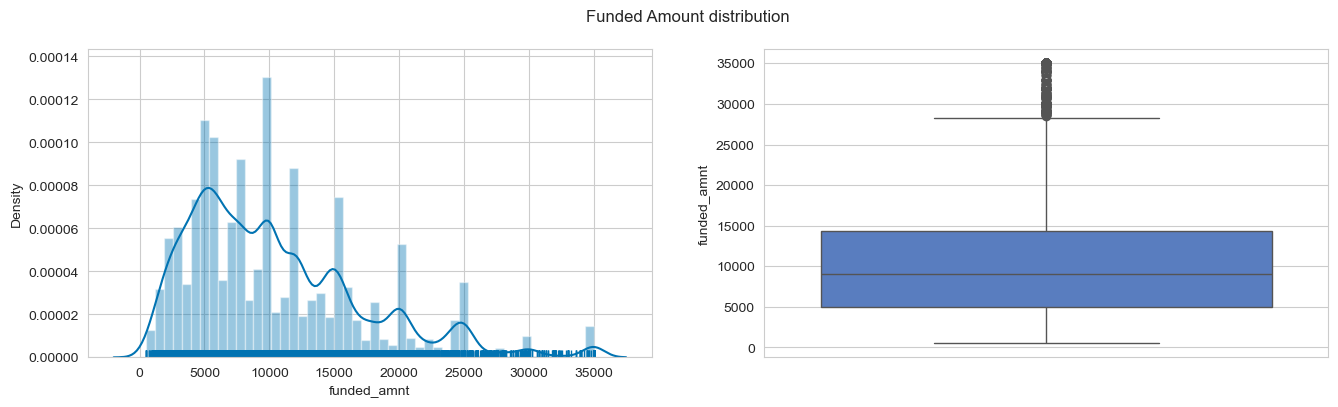

In [832]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(a=lending_data.funded_amnt, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=lending_data.funded_amnt, palette='muted')
plt.suptitle('Funded Amount distribution')
plt.show()

In [833]:
lending_data.funded_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    14400.0
0.900    20000.0
0.950    25000.0
0.970    25000.0
0.975    26000.0
0.980    28120.0
0.990    34000.0
1.000    35000.0
Name: funded_amnt, dtype: float64

**Observations**:
From above plots, we understand that maximum loans were funded with amount ranging from 0 - 15k. Very few loans were funded with amount 30k and above.

Further, graphs represent similar curves like loan_amount and percentile values show that both loan_amount and funded_amount are same. Which creates impression that most of the requested loans were fully approved

## Funded Amount By Investor

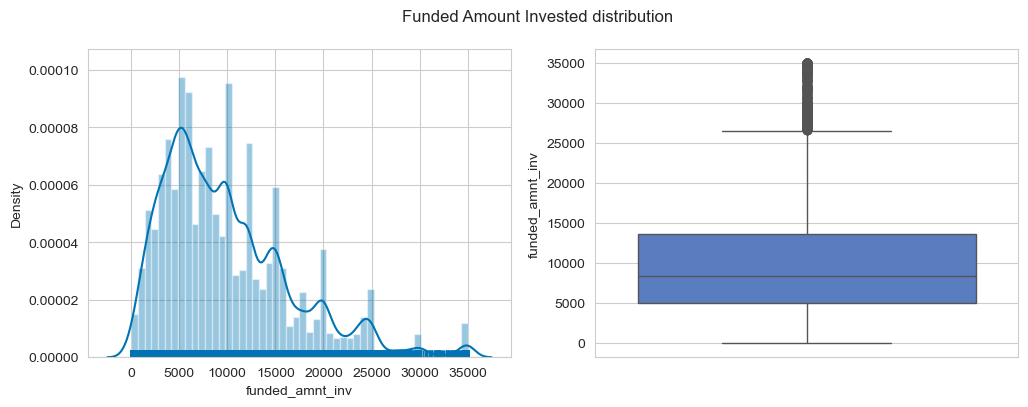

In [834]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=lending_data.funded_amnt_inv, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=lending_data.funded_amnt_inv, palette='muted')
plt.suptitle('Funded Amount Invested distribution')
plt.show()

In [835]:
lending_data.funded_amnt_inv.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    13650.000000
0.900    19750.000000
0.950    23950.000000
0.970    24975.000000
0.975    25425.000000
0.980    27957.387528
0.990    31972.253592
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

**Observations**:
Graphs represent similar curves like loan_amount and percentile values show that both loan_amount and funded_amnt_inv are somewhat same. 
This proves that most loans were fully funded

In [836]:
## Term of loan - Categorical Data

<Axes: xlabel='term'>

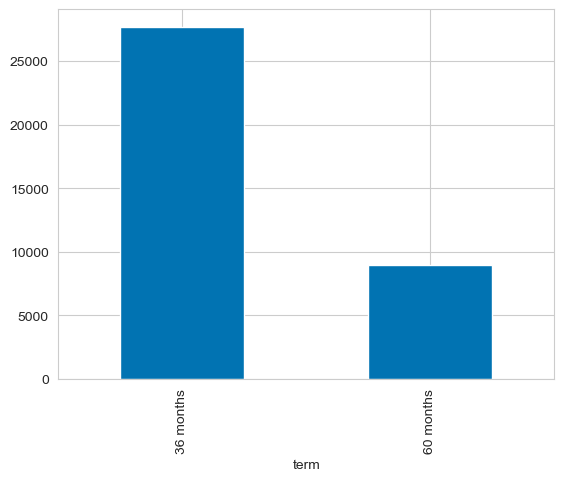

In [837]:
# since term is categorical column we can use bar chart for analysis
lending_data.term.value_counts().plot.bar()

**Observations:**  
There are only 2 possible loan tenure 36 months or 60 months. Most in 36 month category.

In [838]:
## Interest Rate Distribution

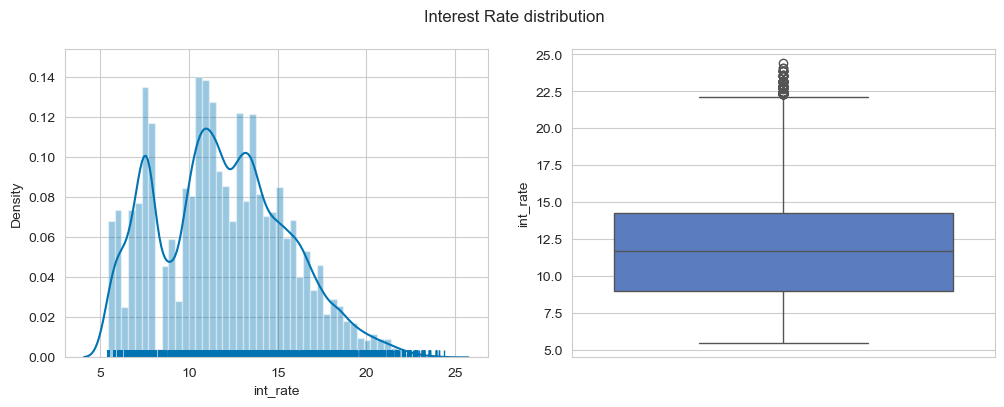

In [839]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=lending_data.int_rate, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=lending_data.int_rate, palette='muted')
plt.suptitle('Interest Rate distribution')
plt.show()

In [840]:
lending_data.int_rate.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    14.27
0.900    16.77
0.950    18.25
0.970    19.29
0.975    19.42
0.980    19.91
0.990    20.89
1.000    24.40
Name: int_rate, dtype: float64

## Interest rate group distribution

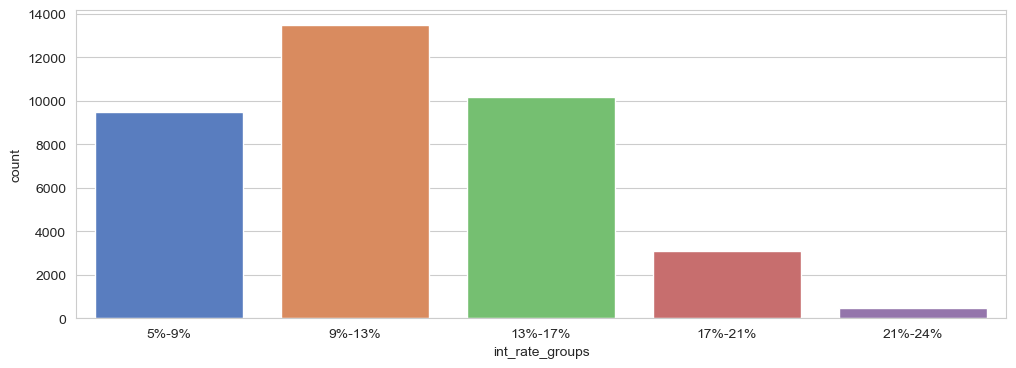

In [841]:
plt.figure(figsize=(12,4))
sns.countplot(x='int_rate_groups', data=lending_data, palette='muted')
plt.show()

**Observations**:
From the above 2 plots and statistics of interest rates we can conclude that most of the interest rates lies between 9% to 13%. 
Few people took loan at high interest rate

<Axes: xlabel='grade'>

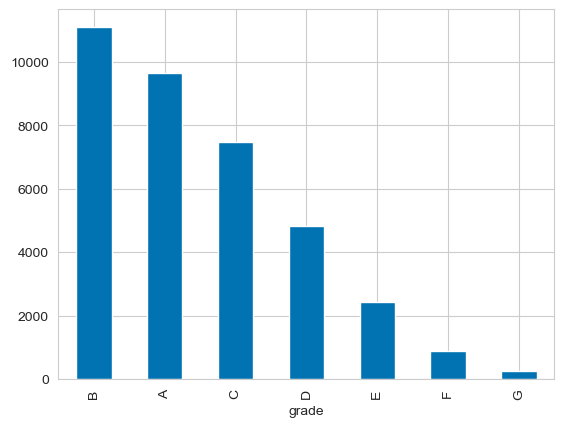

In [842]:
lending_data['grade'].value_counts().plot.bar()

**Observations**: From above plot we can conclude that most borrowers fall in A and B grades

<Axes: xlabel='sub_grade'>

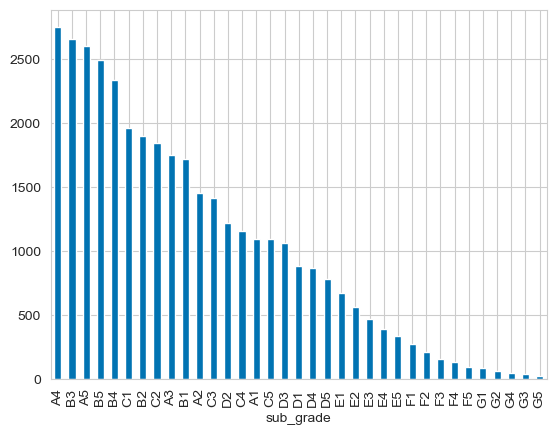

In [843]:
lending_data['sub_grade'].value_counts().plot.bar()

**Observations**: From above plot we cannot conclude anything we need to club and check more data before we jump to any conclusion

<Axes: xlabel='home_ownership'>

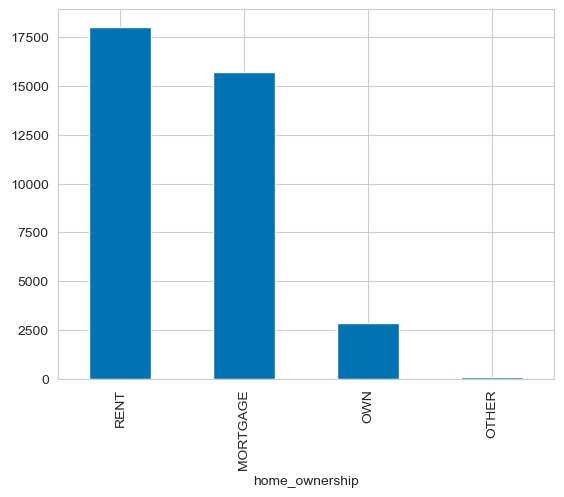

In [844]:
lending_data.home_ownership.value_counts().plot.bar()

**Observations**: From above plot we can conclude that most borrowers either stay in rented house or have a mortgage.
Only few own their house. 

Also we see few home owners tagged as others which we need to ignore and few marked as none. These outliers need to be addressed 

<Axes: xlabel='verification_status'>

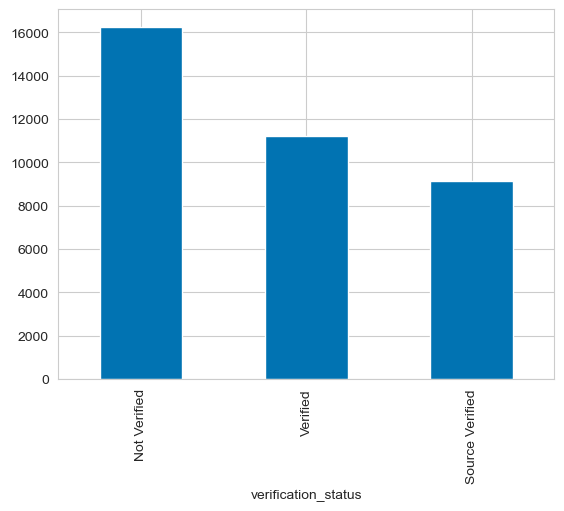

In [845]:
lending_data.verification_status.value_counts().plot.bar()

**Observation** From above plot we can conclude that either loan application were verfied by lender or by third party. Few were not verified.
This can further be used in segmented / bivariant analysis to check if it had any implication on being defaulter

<Axes: xlabel='addr_state'>

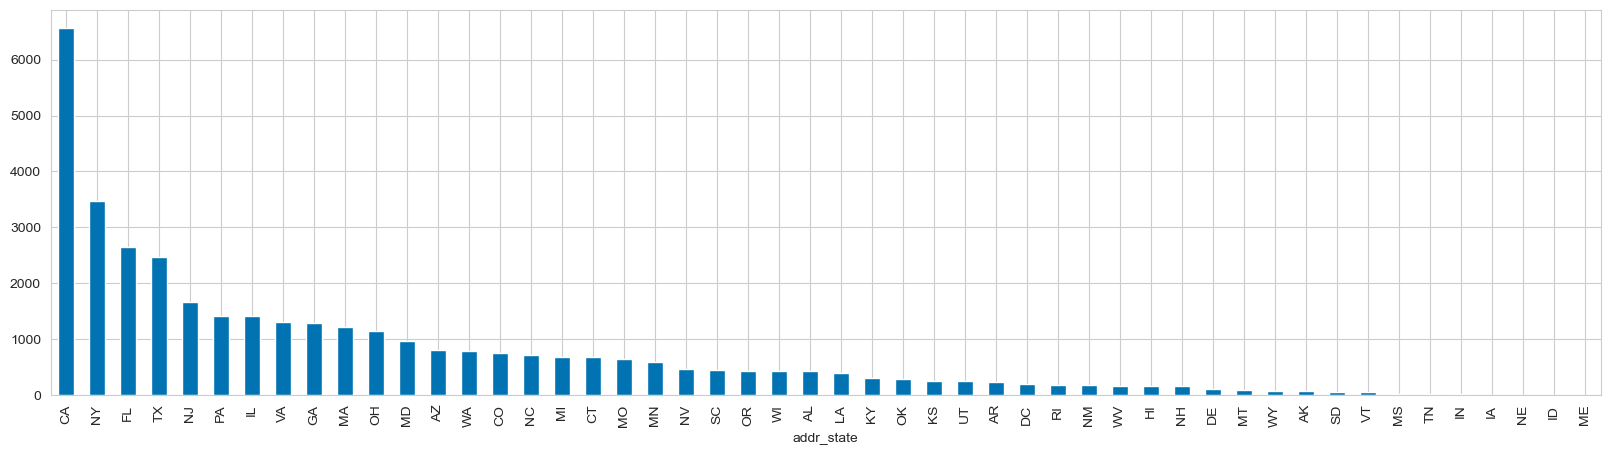

In [846]:
plt.figure(figsize=(20,5))
lending_data.addr_state.value_counts().plot.bar()

**Observation**
Most loans were given in CA / NY/ FL / TX
Very few loans were given in other states

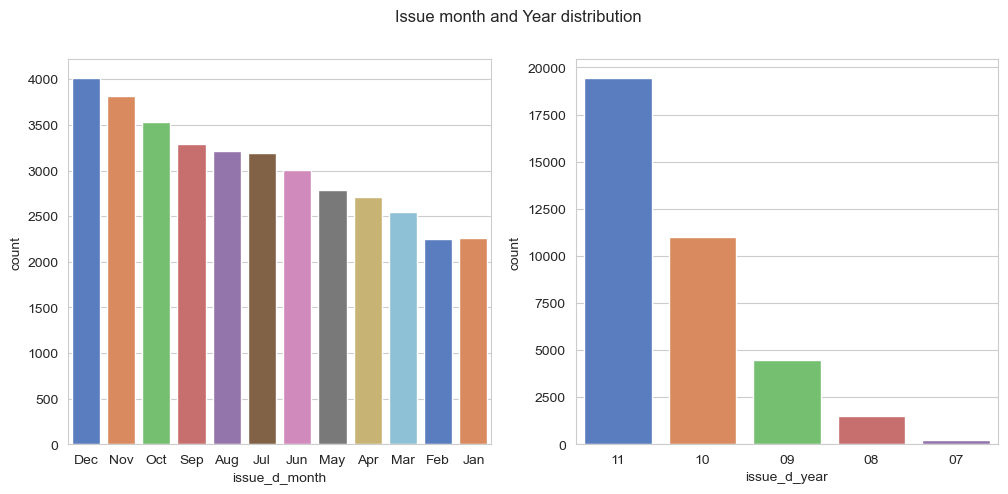

In [847]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='issue_d_month', data=lending_data, palette='muted')
plt.subplot(1,2,2)
sns.countplot(x='issue_d_year', data=lending_data, palette='muted')
plt.suptitle('Issue month and Year distribution')
plt.show()

**Observation**: From above plot we see that loan issued increases as year progresses. Jan number of loans are less but DEC number of loans issues are at its peak.
May be because they need to achieve year target or may be more loan applications come in at year end due to vacations.

And from issue year plot graph we see that number of loans issues have almost doubled every year passing by.

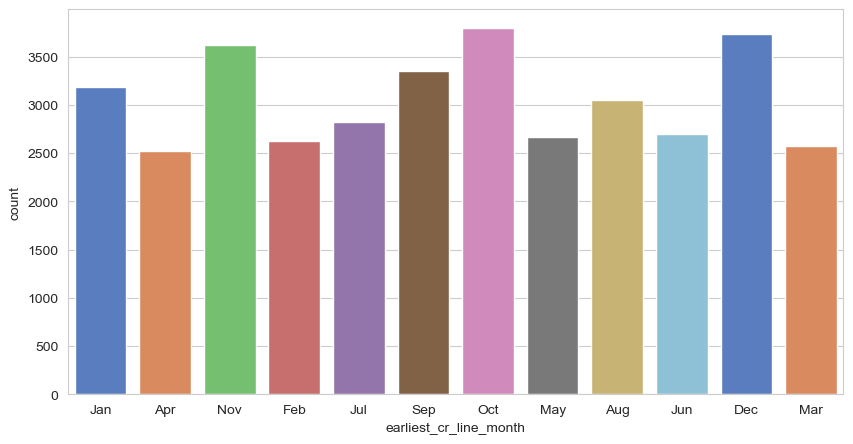

In [848]:
plt.figure(figsize=(10,5))
sns.countplot(x='earliest_cr_line_month', data=lending_data, palette='muted')
plt.show()

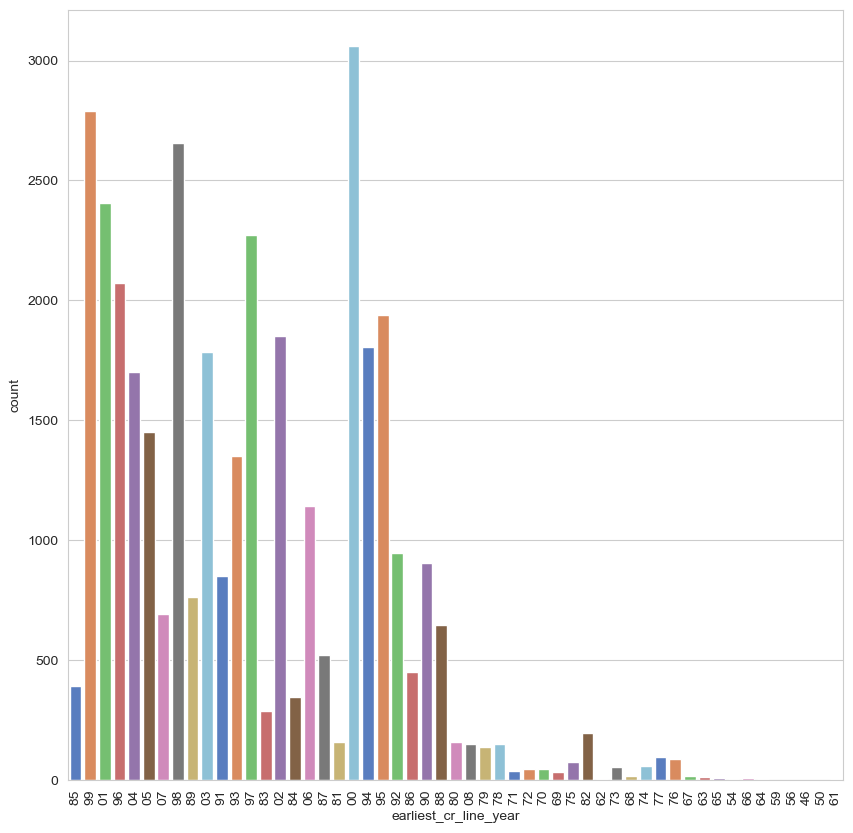

In [849]:
plt.figure(figsize=(10,10))
sns.countplot(x='earliest_cr_line_year', data=lending_data, palette='muted')
plt.xticks(rotation=90)
plt.show()

**Observation** : No conlucsion can be found out from above plot. Since data is so widely spread out in number of years we cannot derive major insights

<Axes: xlabel='pub_rec_bankruptcies'>

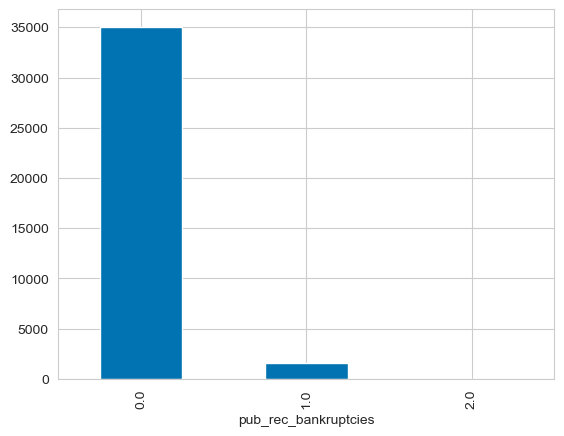

In [850]:
lending_data.pub_rec_bankruptcies.value_counts().plot.bar()

**Observation** : Most borrowers past public record is clean and have 0 bankruptcy. Few have recorded 1 bankruptcy and very few recorded 2 bankruptcy.
Further in segmented / bivariant analysis we can further validate if it has impact on being a defaulter

<Axes: xlabel='purpose'>

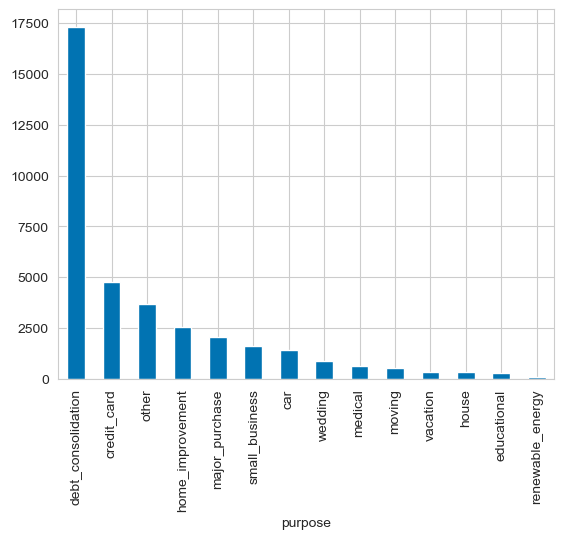

In [851]:
lending_data.purpose.value_counts().plot.bar()

**Observation** : Most borrowers took loan for debt_consolidation, we can further check relationship with defaulter borrower count in segmeneted and bivaraint analysis

In [852]:
sns.set_style('whitegrid')

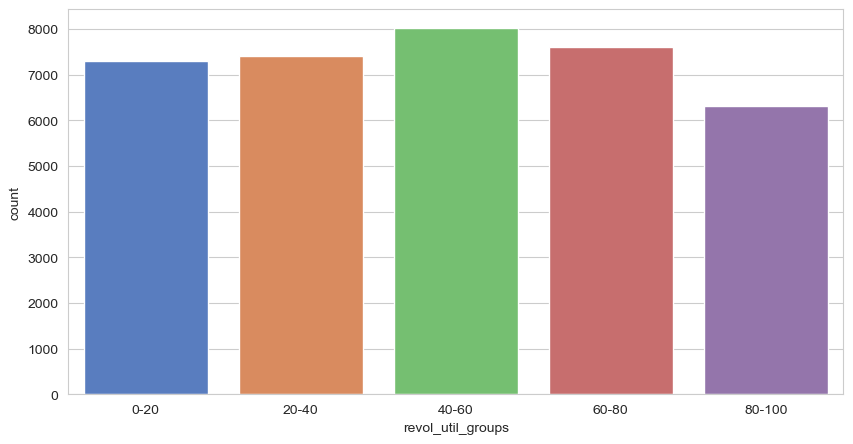

In [853]:
plt.figure(figsize=(10,5))
sns.countplot(x='revol_util_groups', data=lending_data, palette='muted')
plt.show()

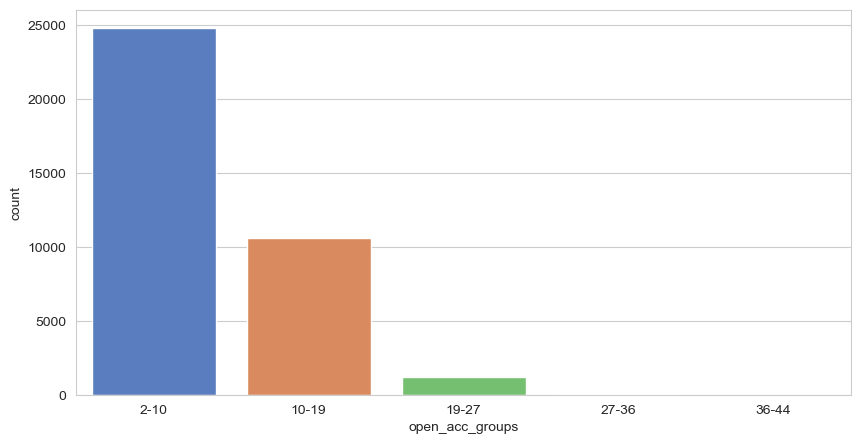

In [854]:
plt.figure(figsize=(10,5))
sns.countplot(x='open_acc_groups', data=lending_data, palette='muted')
plt.show()

**Observation** Maximum borrowers have 2-20 cred lines open

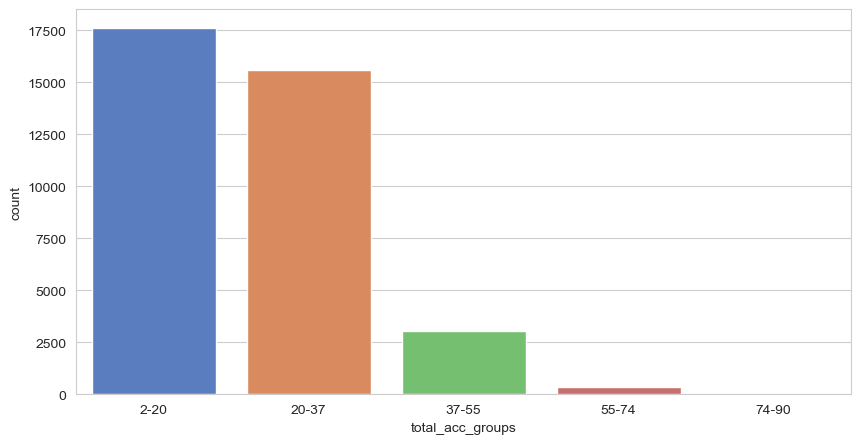

In [855]:
plt.figure(figsize=(10,5))
sns.countplot(x='total_acc_groups', data=lending_data, palette='muted')
plt.show()

**Observation** Total active credit lines is in range of 2-20

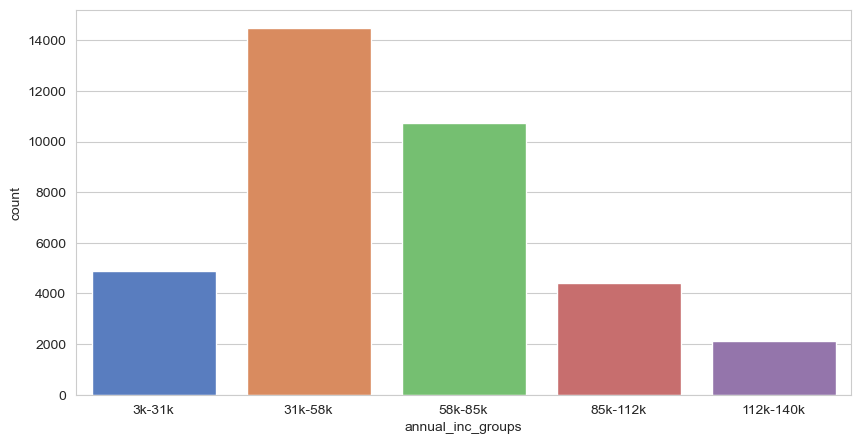

In [856]:
plt.figure(figsize=(10,5))
sns.countplot(x='annual_inc_groups', data=lending_data, palette='muted')
plt.show()

**Observation**
Maximum borrower income range is between 31k-85k range

# Segmented Univariant analysis

Text(0.5, 1.0, 'Loan Status vs Loan Amount')

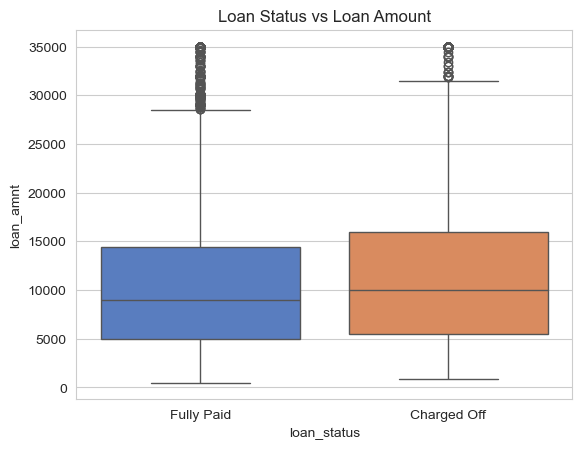

In [857]:
sns.boxplot(x='loan_status', y='loan_amnt', data=lending_data, palette='muted')
plt.title('Loan Status vs Loan Amount')

<Axes: title={'center': 'Grade vs Loan Amount'}, xlabel='grade', ylabel='loan_amnt'>

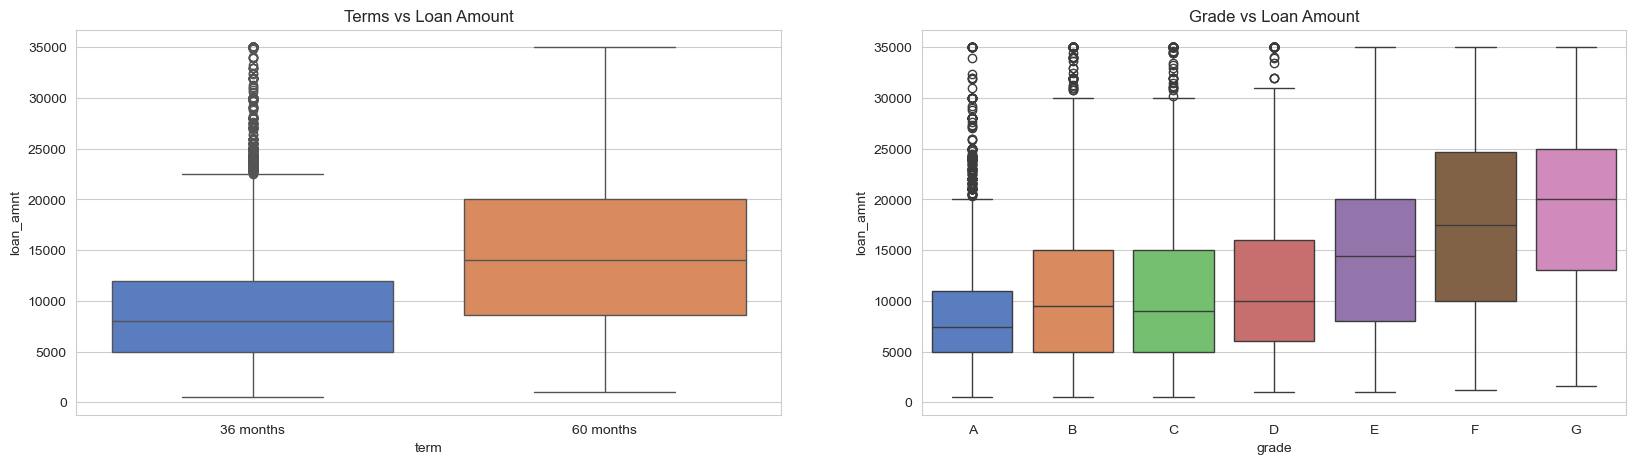

In [858]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=lending_data.loan_amnt, data=lending_data, palette='muted')
plt.title('Terms vs Loan Amount')
plt.subplot(122)
plt.title('Grade vs Loan Amount')
#Finding grades with sorted alphabetical order
grade_ord = lending_data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=lending_data.loan_amnt, order = grade_ord, data=lending_data, palette='muted')

**Observation** : <br>
Charged Off loan amount is greater than Fully Paid loan amount <br>
Loan amount and loan tenure are directly propotional to each other. Higher loan amount will have more tenure <br>
Loan amount wil grade F and G have took maximun loan amount. As grades decrease loan amount also decreases

<Axes: xlabel='count', ylabel='term'>

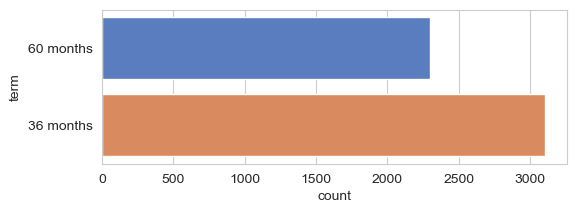

In [859]:
fig, ax = plt.subplots(figsize = (6,2))
sns.countplot(y ='term', data=lending_data[lending_data.loan_status == 'Charged Off'], palette='muted')

**Observation** : Most loans which were defaulted were of 36 months tenure

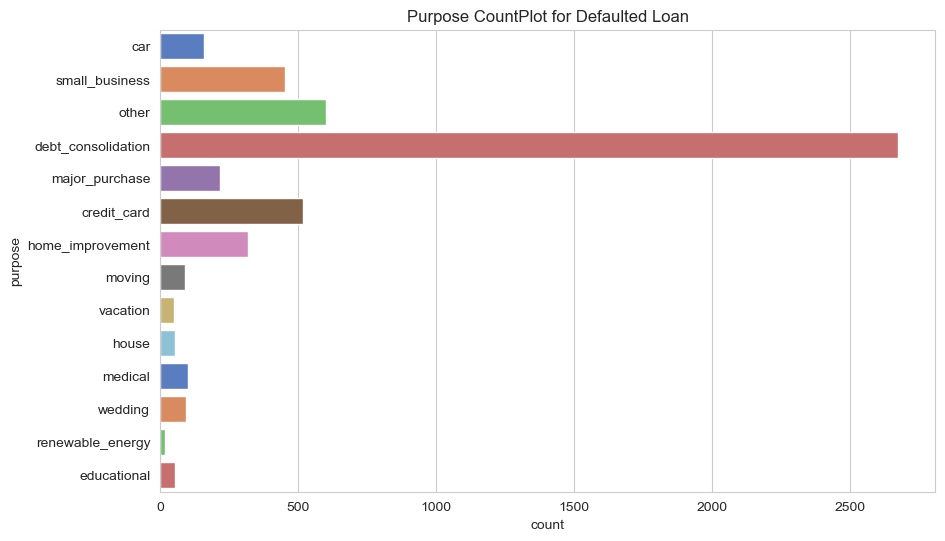

In [949]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(y ='purpose', data=lending_data[lending_data.loan_status == 'Charged Off'], palette='muted')
plt.title('Purpose CountPlot for Defaulted Loan')
plt.show()

**Observation**: Most charged off loans are for debt consolidation. May be as already borrower has other loans they might be defaulting on other loans as well

In [861]:
lending_data.sub_grade.value_counts()

sub_grade
A4    2752
B3    2658
A5    2602
B5    2494
B4    2336
C1    1963
B2    1901
C2    1843
A3    1751
B1    1720
A2    1453
C3    1418
D2    1220
C4    1155
A1    1098
C5    1093
D3    1065
D1     884
D4     869
D5     787
E1     675
E2     562
E3     468
E4     392
E5     340
F1     275
F2     215
F3     156
F4     137
F5      98
G1      87
G2      66
G4      45
G3      41
G5      22
Name: count, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

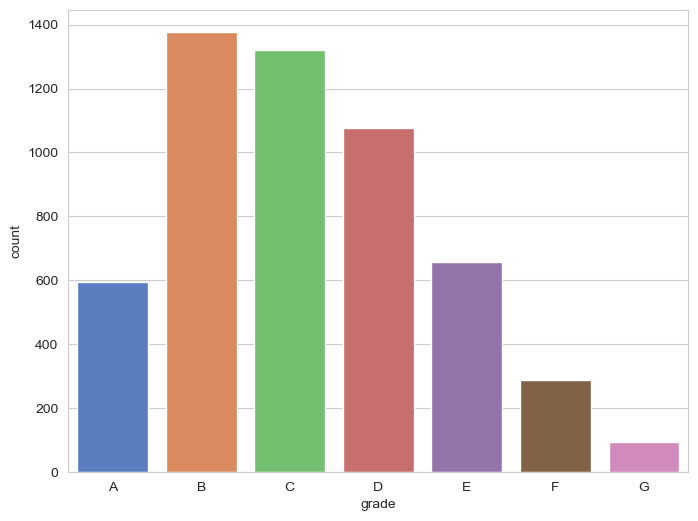

In [862]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] ,data = lending_data[lending_data.loan_status == 'Charged Off'], width=0.8, palette='muted')

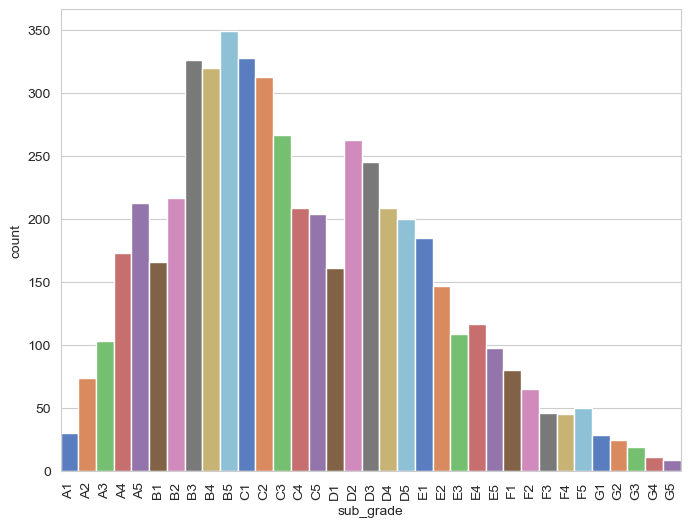

In [863]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x = 'sub_grade', order = ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5' , 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'] ,data = lending_data[lending_data.loan_status == 'Charged Off'], width=1, palette='muted')
plt.xticks(rotation=90)
plt.show()

In [864]:
lending_data['sub_grade_group'] = pd.to_numeric(lending_data.sub_grade.apply(lambda x : x[-1]))

In [865]:
lending_data.head()

id  loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  \
0  1077501       5000         5000           4975.0  36 months     10.65   
1  1077430       2500         2500           2500.0  60 months     15.27   
2  1077175       2400         2400           2400.0  36 months     15.96   
3  1076863      10000        10000          10000.0  36 months     13.49   
5  1075269       5000         5000           5000.0  36 months      7.90   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT     24000.0   
1        59.83     C        C4   < 1 year           RENT     30000.0   
2        84.33     C        C5  10+ years           RENT     12252.0   
3       339.31     C        C1  10+ years           RENT     49200.0   
5       156.46     A        A4    3 years           RENT     36000.0   

  verification_status issue_d  loan_status         purpose zip_code  \
0            Verified  Dec-11   Fully Paid     credit_card    860xx   
1     Source Verified  Dec-11  Charged Off             car    309xx   
2        Not Verified  Dec-11   Fully Paid  small_business    606xx   
3     Source Verified  Dec-11   Fully Paid           other    917xx   
5     Source Verified  Dec-11   Fully Paid         wedding    852xx   

  addr_state    dti earliest_cr_line  inq_last_6mths  open_acc  pub_rec  \
0         AZ  27.65           Jan-85               1         3        0   
1         GA   1.00           Apr-99               5         3        0   
2         IL   8.72           Nov-01               2         2        0   
3         CA  20.00           Feb-96               1        10        0   
5         AZ  11.20           Nov-04               3         9        0   

   revol_util  total_acc  out_prncp_inv  total_pymnt_inv  \
0        83.7          9            0.0          5833.84   
1         9.4          4            0.0          1008.71   
2        98.5         10            0.0          3005.67   
3        21.0         37            0.0         12231.89   
5        28.3         12            0.0          5632.21   

   pub_rec_bankruptcies issue_d_month issue_d_year earliest_cr_line_month  \
0                   0.0           Dec           11                    Jan   
1                   0.0           Dec           11                    Apr   
2                   0.0           Dec           11                    Nov   
3                   0.0           Dec           11                    Feb   
5                   0.0           Dec           11                    Nov   

  earliest_cr_line_year int_rate_groups open_acc_groups revol_util_groups  \
0                    85          9%-13%            2-10            80-100   
1                    99         13%-17%            2-10              0-20   
2                    01         13%-17%            2-10            80-100   
3                    96         13%-17%            2-10             20-40   
5                    04           5%-9%            2-10             20-40   

  total_acc_groups annual_inc_groups  sub_grade_group  
0             2-20            3k-31k                2  
1             2-20            3k-31k                4  
2             2-20            3k-31k                5  
3            20-37           31k-58k                1  
5             2-20           31k-58k                4

<Axes: xlabel='grade', ylabel='count'>

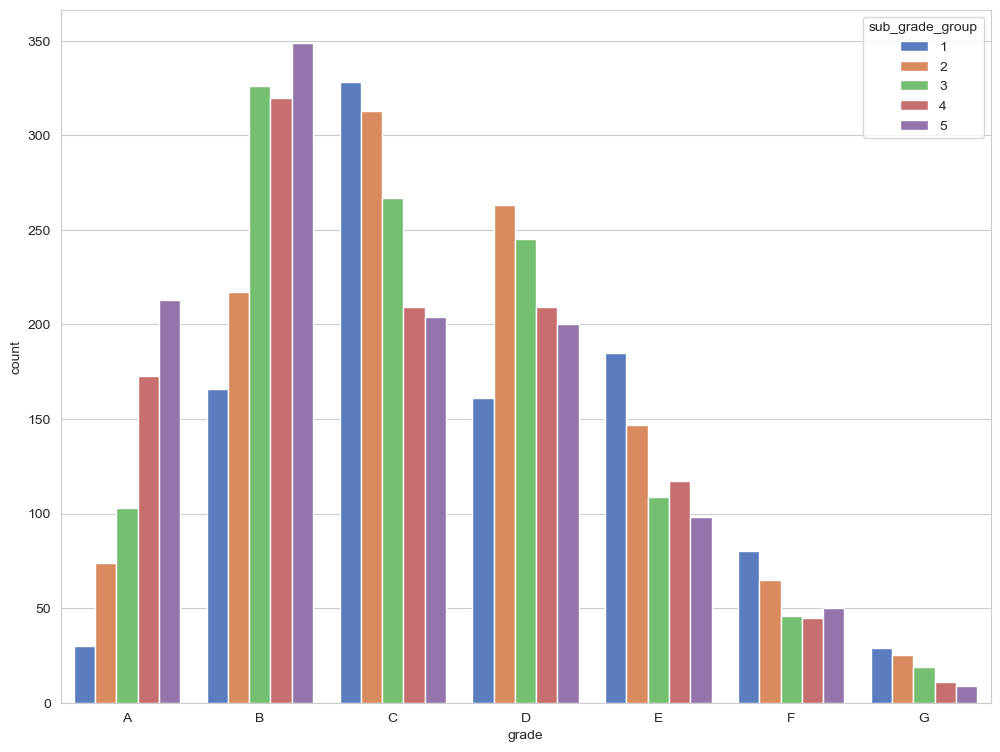

In [866]:
fig, ax = plt.subplots(figsize=(12,9))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade_group',data = lending_data[lending_data.loan_status == 'Charged Off'] , palette='muted')

**Observation**: We conclude that grades of B3-C2 have maximum defaults <br>
However when we see Grades and Sub Grade data they do not match. As per subgrades max defaults are in A, B, C.
And as per Grades max defaults are for E,F,G grades. Hence we consider Grades as measure of truth for further analysis

Text(0.5, 0, 'Interest Rate')

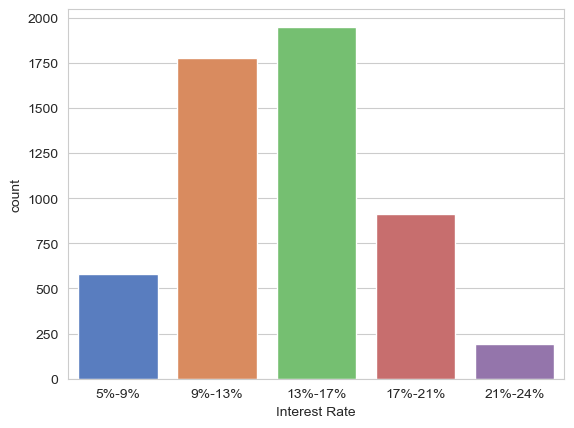

In [867]:
sns.countplot(x='int_rate_groups', data=lending_data[lending_data.loan_status == 'Charged Off'], palette='muted')
plt.xlabel('Interest Rate')

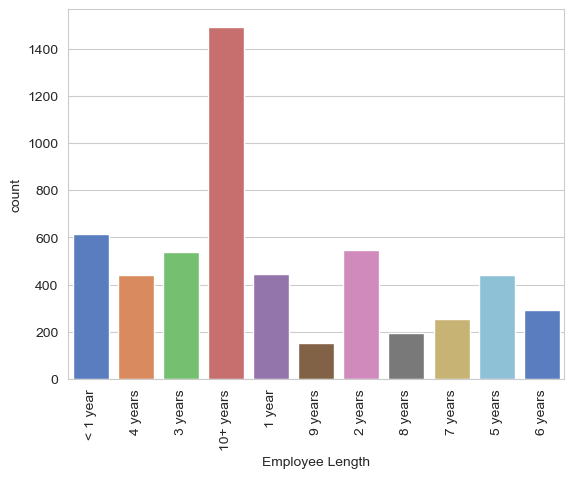

In [868]:
sns.countplot(x='emp_length', data=lending_data[lending_data.loan_status == 'Charged Off'], palette='muted')
plt.xlabel('Employee Length')
plt.xticks(rotation=90)
plt.show()

**Observation**: We conclude that maximum loans were defaulted by borrower whose employment tenure was 10+ Years

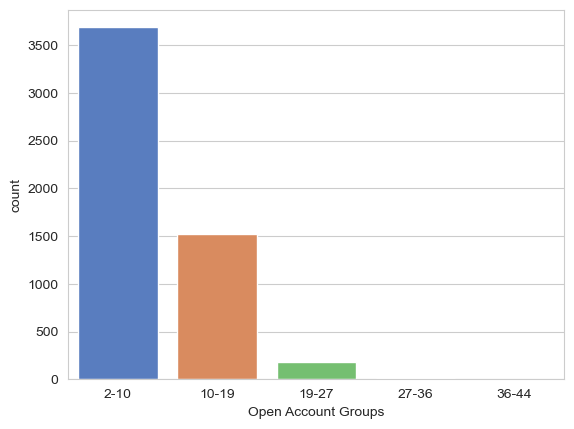

In [869]:
sns.countplot(x='open_acc_groups', data=lending_data[lending_data.loan_status == 'Charged Off'], palette='muted')
plt.xlabel('Open Account Groups')
plt.show()

**Observation**: We conclude that maximum loans were defaulted by borrower who had 2-10 open credit lines

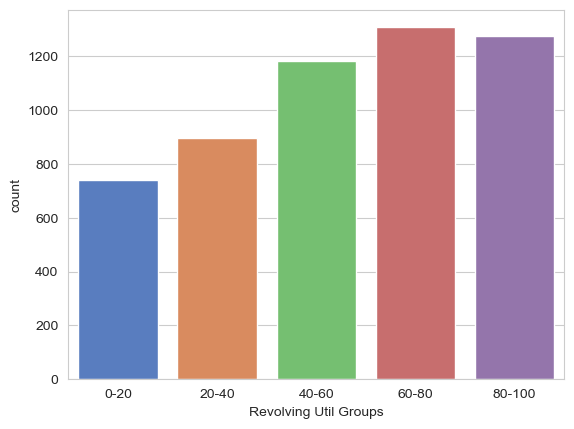

In [870]:
sns.countplot(x='revol_util_groups', data=lending_data[lending_data.loan_status == 'Charged Off'], palette='muted')
plt.xlabel('Revolving Util Groups')
plt.show()

**Observation** : We conclude that most defaults were done by borrower who had revolving line utilization rate of 60-80

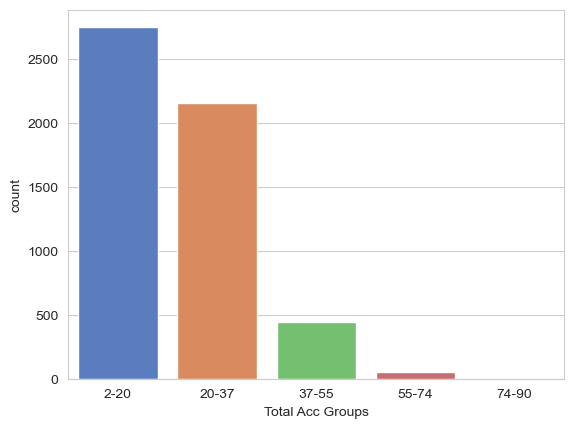

In [871]:
sns.countplot(x='total_acc_groups', data=lending_data[lending_data.loan_status == 'Charged Off'], palette='muted')
plt.xlabel('Total Acc Groups')
plt.show()

**Observation** : If borrower has 2-10 active credit lines, they are likely to default. Lower the number of credit line more the chances of defaulting a loan

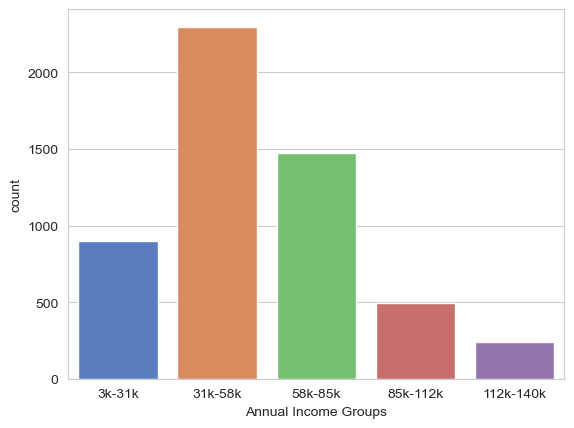

In [872]:
sns.countplot(x='annual_inc_groups', data=lending_data[lending_data.loan_status == 'Charged Off'], palette='muted')
plt.xlabel('Annual Income Groups')
plt.show()

**Observation**: We conclude that borrower who falls in income less than 85k are more likely to default

<Axes: xlabel='verification_status', ylabel='count'>

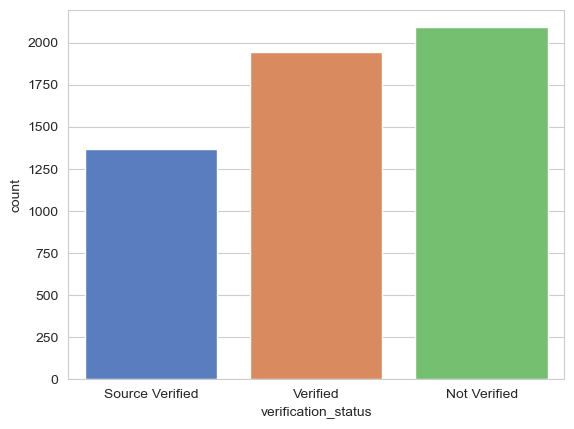

In [873]:
sns.countplot(x='verification_status', data=lending_data[lending_data['loan_status']=='Charged Off'], palette='muted')

**Observation**
There are 2 observations here.
    - Loans which are not verified are more likely to default.
    - And loans which are not veirified at source are also prone to defauting.

<Axes: xlabel='inq_last_6mths', ylabel='count'>

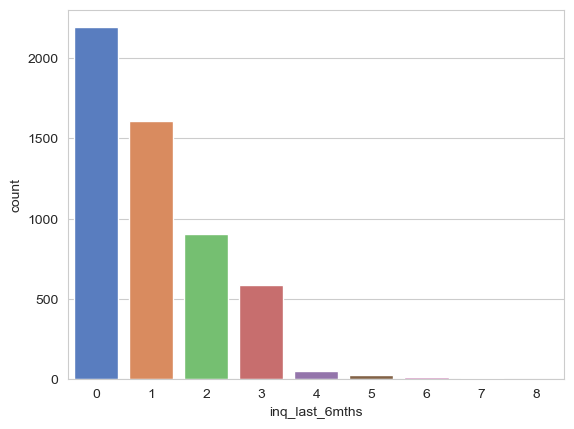

In [874]:
sns.countplot(x='inq_last_6mths', data=lending_data[lending_data['loan_status']=='Charged Off'], palette='muted')

**Observation** : Borrowers who did not enquire at all in last 6 months are more likely to default

<Axes: xlabel='issue_d_month', ylabel='count'>

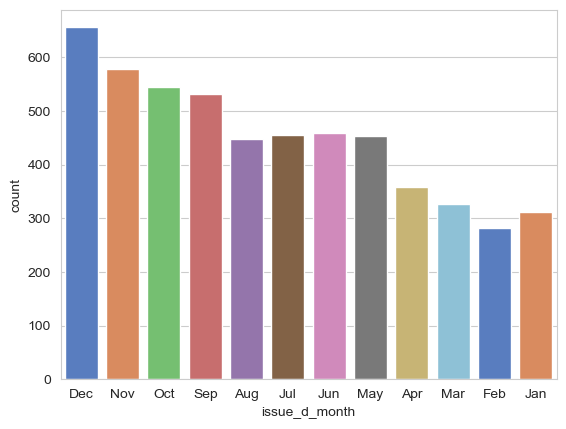

In [875]:
sns.countplot(x='issue_d_month', data=lending_data[lending_data['loan_status']=='Charged Off'], palette='muted')

<Axes: xlabel='issue_d_year', ylabel='count'>

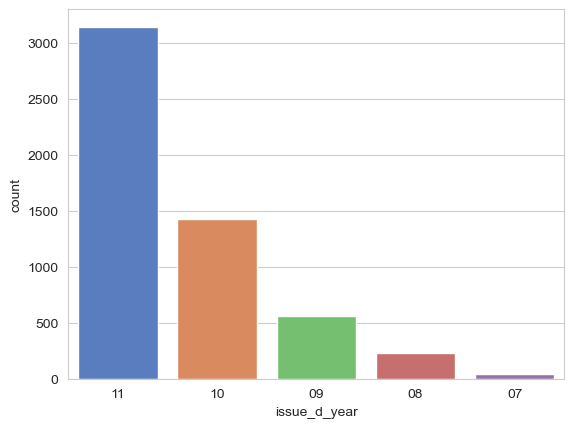

In [876]:
sns.countplot(x='issue_d_year', data=lending_data[lending_data['loan_status']=='Charged Off'], palette='muted')

**Observation** : We saw in univariant analysis maximum loans were granted in last quater and especially in the month of December and in year 2011.

As per above plot we see maximum defaults also happening in Dec and year 2011

## Interest Rate

<Axes: title={'center': 'Grade vs Interest Rate'}, xlabel='grade', ylabel='int_rate'>

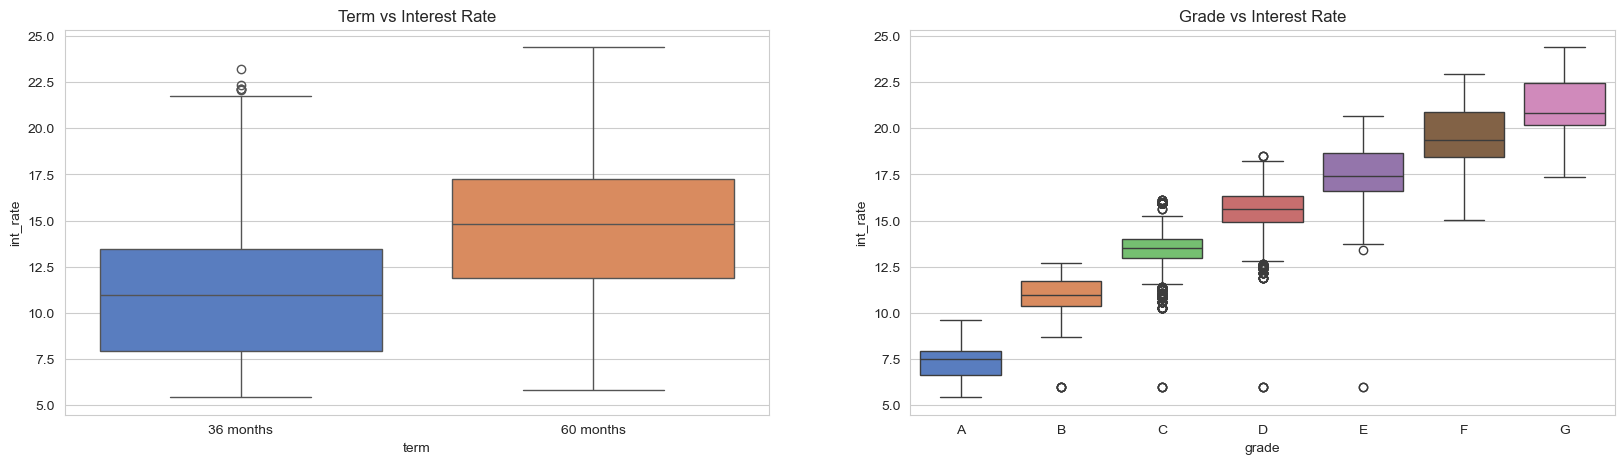

In [877]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=lending_data.int_rate, data=lending_data, palette='muted')
plt.title('Term vs Interest Rate')
plt.subplot(122)
plt.title('Grade vs Interest Rate')
grade_ord = lending_data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=lending_data.int_rate, order = grade_ord, data=lending_data, palette='muted')

<Axes: title={'center': 'verification_status vs Interest Rate'}, xlabel='verification_status', ylabel='int_rate'>

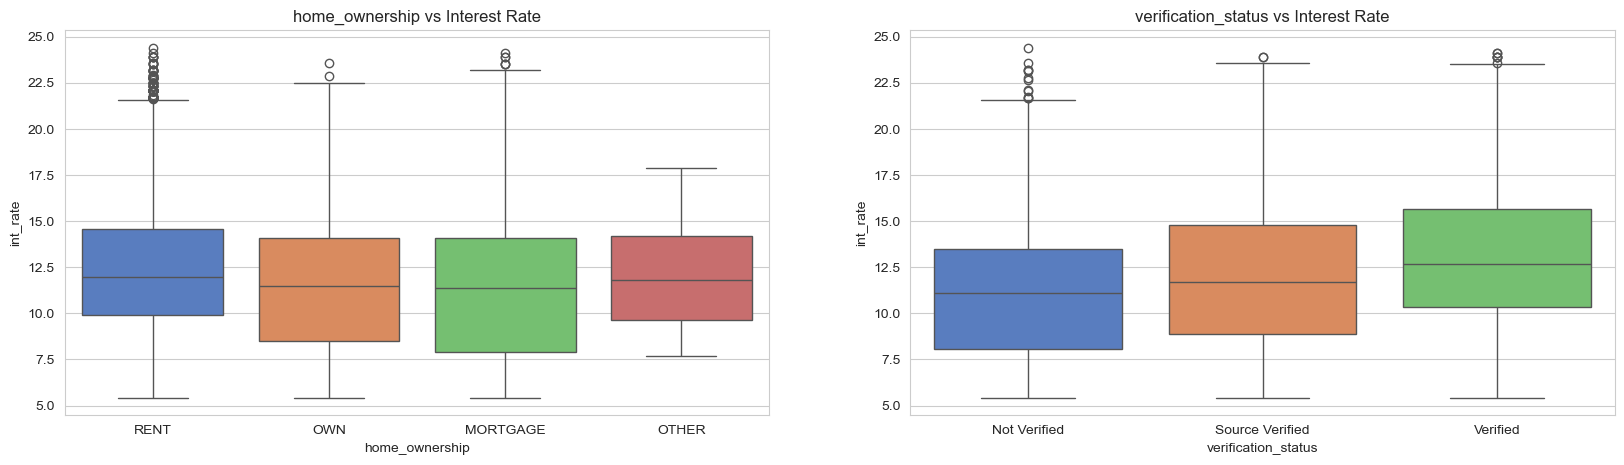

In [878]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=lending_data.int_rate, data=lending_data, palette='muted')
plt.title('home_ownership vs Interest Rate')
plt.subplot(122)
plt.title('verification_status vs Interest Rate')
verification_status_ord = lending_data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=lending_data.int_rate, order = verification_status_ord, data=lending_data, palette='muted')

Text(0.5, 1.0, 'Loan Status vs Interest Rate')

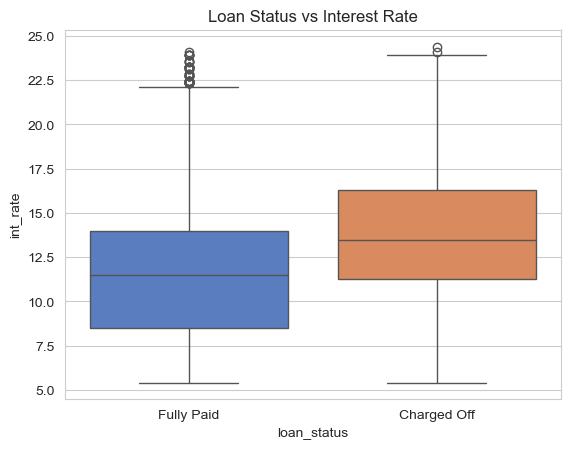

In [879]:
sns.boxplot(x='loan_status', y=lending_data.int_rate, data=lending_data, palette='muted')
plt.title('Loan Status vs Interest Rate')

**Observation** <br>
From above plots we conclude that <br>
 - More the tenure of loan higher the interst rate < br>
 - Interest rates are higher for G, F and keeps on decreasing for better grades. <br>
 - Borrower who has their own home have better interest rates than who are on rent <br>
 - **Maximum loans defaulted are those who had higher interest rates**

In [880]:
lending_data['installment_groups'] = pd.cut(lending_data['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
lending_data['dti_groups'] = pd.cut(lending_data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

Text(0.5, 1.0, 'Loan Status vs dti')

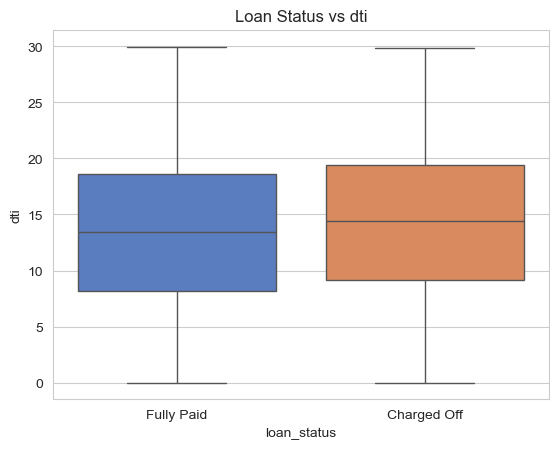

In [881]:
sns.boxplot(x='loan_status', y=lending_data.dti, data=lending_data, palette='muted')
plt.title('Loan Status vs dti')

**Observation** <br>
Loans with high dti are more likely to default

In [882]:
lending_data.dtypes

id                           int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
zip_code                    object
addr_state                  object
dti                        float64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_util                 float64
total_acc                    int64
out_prncp_inv              float64
total_pymnt_inv            float64
pub_rec_bankruptcies       float64
issue_d_month       

Text(0.5, 1.0, 'loan status vs Public record bankruptcies')

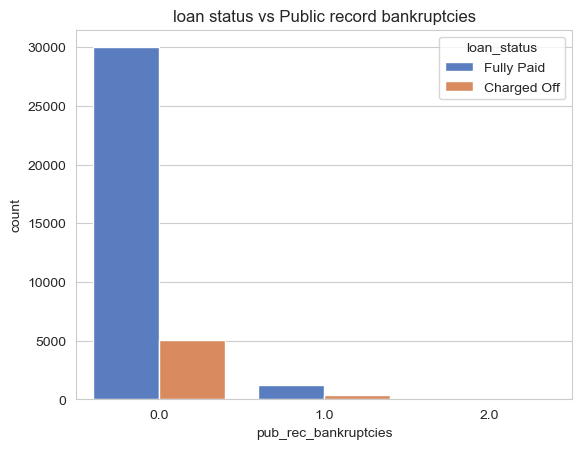

In [883]:
sns.countplot(x=lending_data.pub_rec_bankruptcies, hue='loan_status', data=lending_data, palette='muted')
plt.title('loan status vs Public record bankruptcies')

# Bivariant analysis

In [884]:
#Proportion of values for each category
df = lending_data.groupby(['term', 'loan_status'], as_index=False)['id'].count()
df

term  loan_status     id
0  36 months  Charged Off   3104
1  36 months   Fully Paid  24599
2  60 months  Charged Off   2301
3  60 months   Fully Paid   6637

In [885]:
df['proportion'] = df.groupby('term')['id'].transform(lambda x: x/x.sum())

In [886]:
df

term  loan_status     id  proportion
0  36 months  Charged Off   3104    0.112046
1  36 months   Fully Paid  24599    0.887954
2  60 months  Charged Off   2301    0.257440
3  60 months   Fully Paid   6637    0.742560

Text(0.5, 1.0, 'Term vs Loan status')

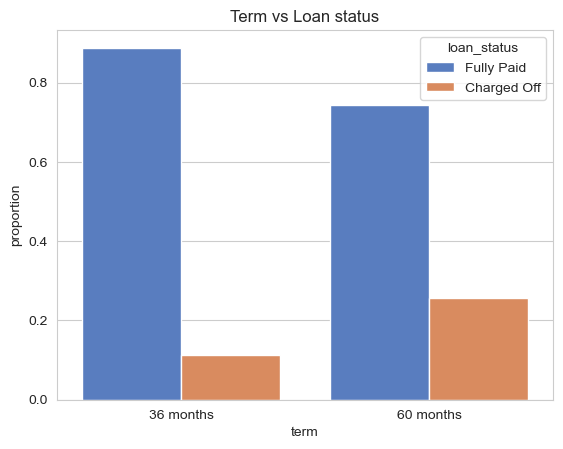

In [887]:
sns.barplot(x='term', y='proportion', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'], palette='muted')
plt.title('Term vs Loan status')

**Observation** <br>
Fully paid loans are high in 36 months tenure <br>
Defaulted loans are high in 60 months tenure

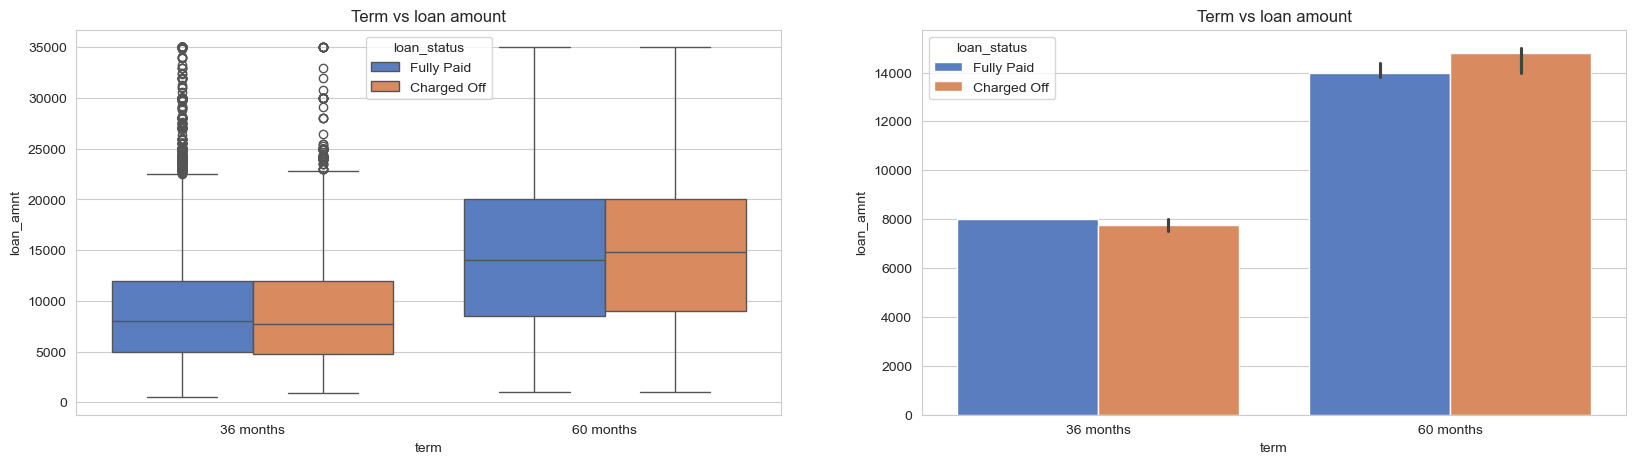

In [888]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=lending_data, palette='muted')
plt.title('Term vs loan amount')
plt.subplot(122)
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=lending_data, estimator=np.median, palette='muted')
plt.title('Term vs loan amount')
plt.show()

**Observations**:  
From above plots we conclude that loan amount does not help determine whether borrower will default loan or not. Both loan status have similar distribution.

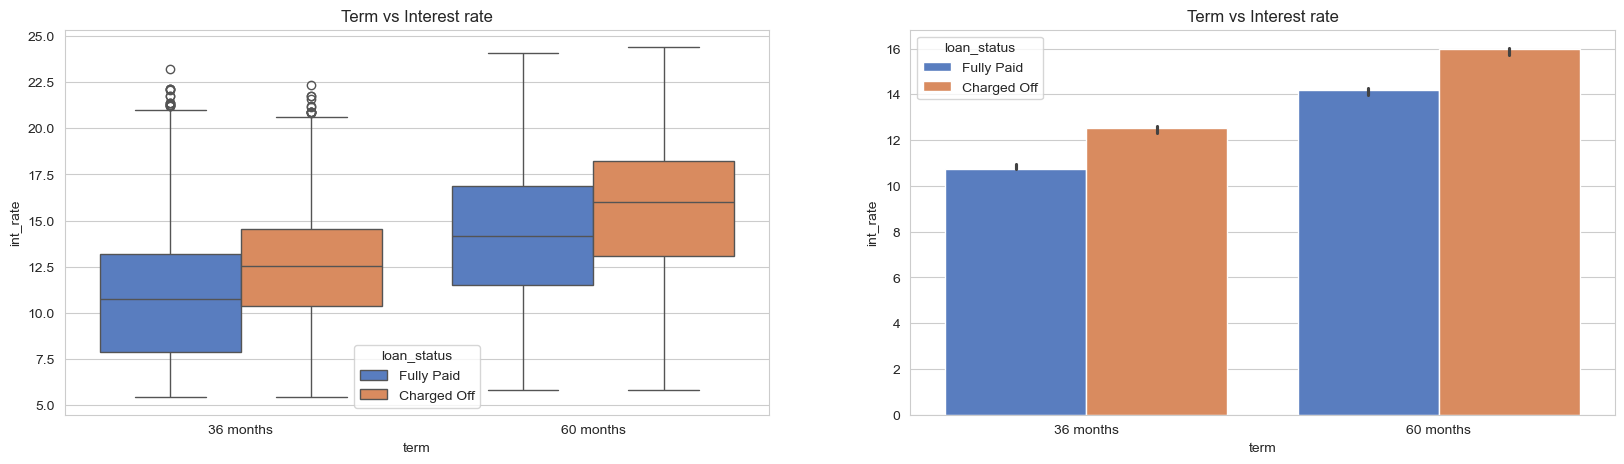

In [889]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=lending_data, palette='muted')
plt.title('Term vs Interest rate')
plt.subplot(122)
sns.barplot(x='term', y='int_rate', hue='loan_status', data=lending_data, estimator=np.median, palette='muted')
plt.title('Term vs Interest rate')
plt.show()

**Observation** <br>
From above plot we conclude that interest rates is high for defaulted loans

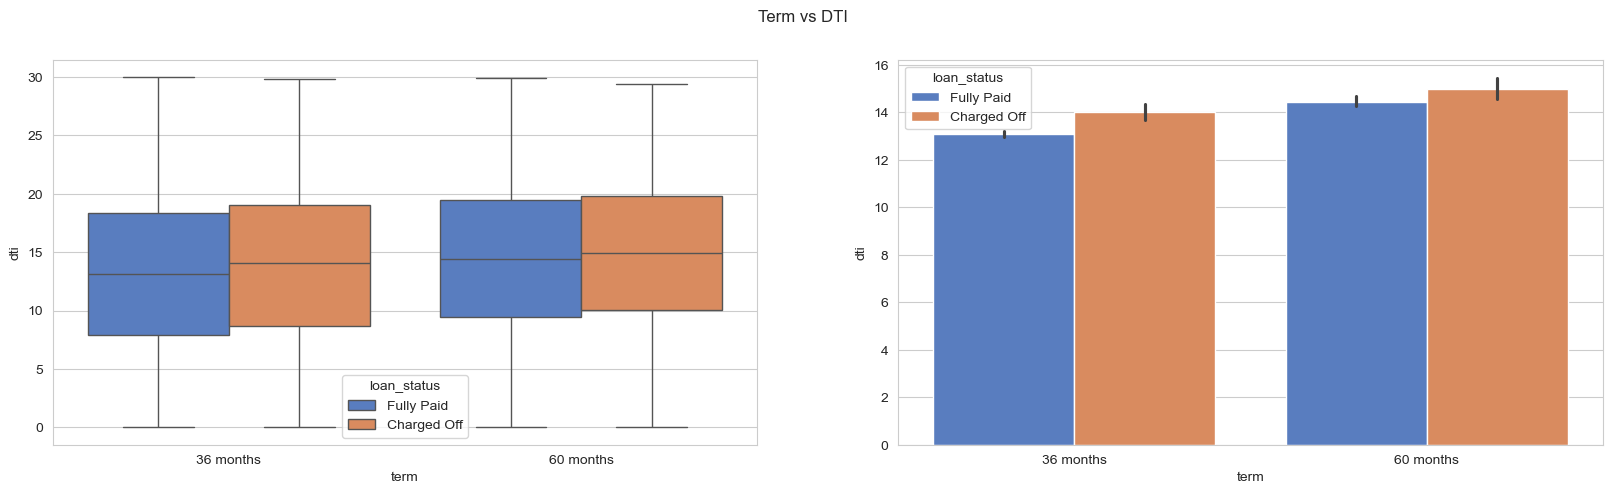

In [890]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='dti', hue='loan_status', data=lending_data, palette='muted')
plt.subplot(122)
sns.barplot(x='term', y='dti', hue='loan_status', data=lending_data, estimator=np.median, palette='muted')
plt.suptitle('Term vs DTI')
plt.show()

**Observation** <br>
Debt to income ratio is high for defaulted loans

Text(0.5, 1.0, 'Grade vs Loan status')

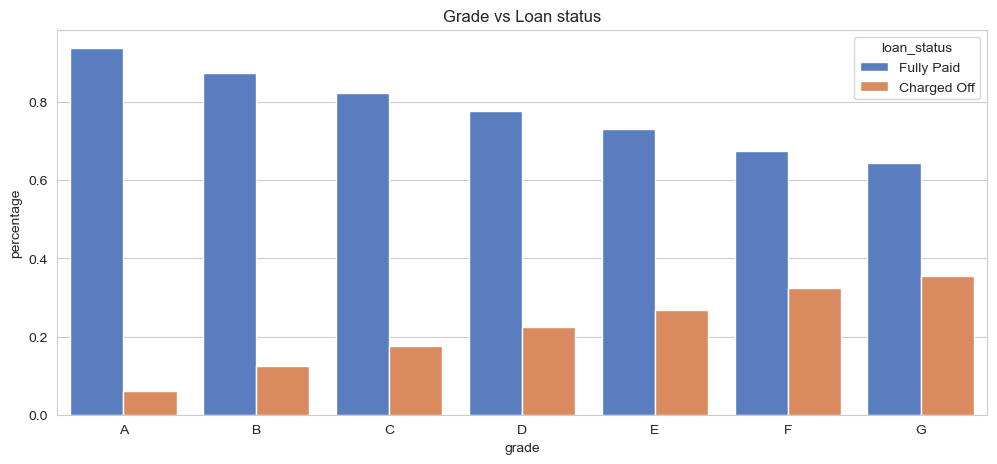

In [891]:
df = lending_data.groupby(['grade', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('grade')['id'].transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='grade', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'], palette='muted')
plt.title('Grade vs Loan status')

**Observation** <br>
Defaults have increased as grades lowered. A Grade has lowest defaults whereas G has highest defaults

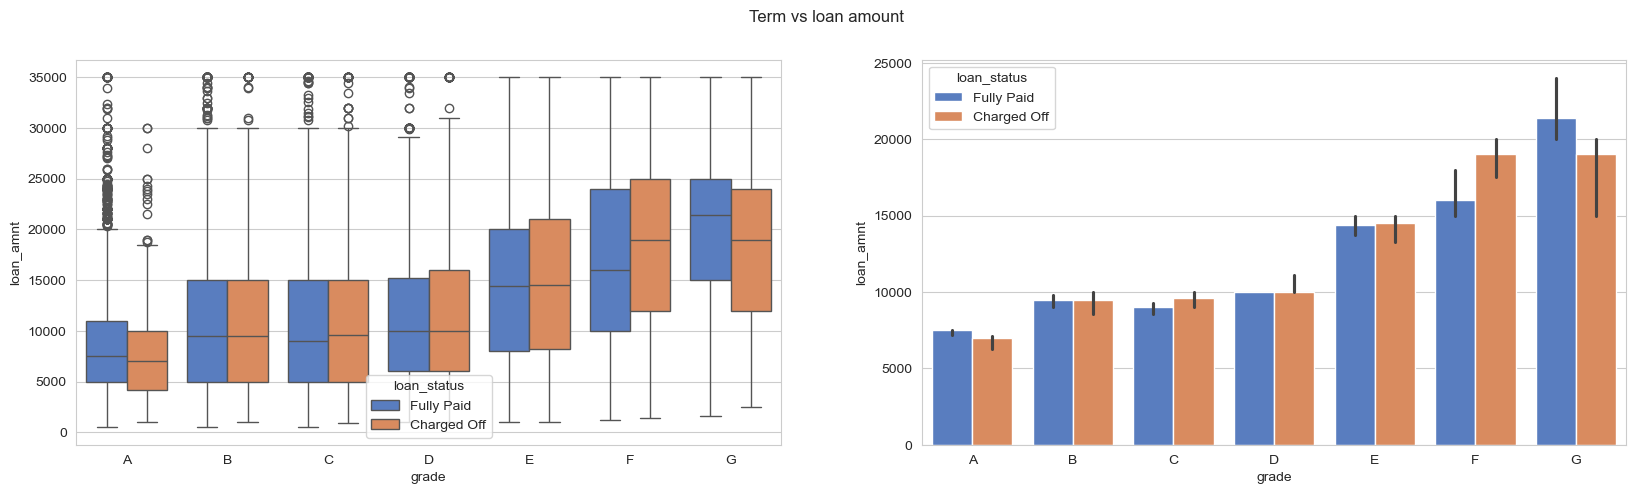

In [892]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='loan_amnt', hue='loan_status', data=lending_data, order = grade_ord, palette='muted')
plt.subplot(122)
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=lending_data, estimator=np.median, order = grade_ord, palette='muted')
plt.suptitle('Term vs loan amount')
plt.show()

**Observation** <br>
Lower grades(E,F,G) have taken higher loan and have high default rate <br>
Grades A, B, C, D , E have almost similar range for fully paid and charged off count

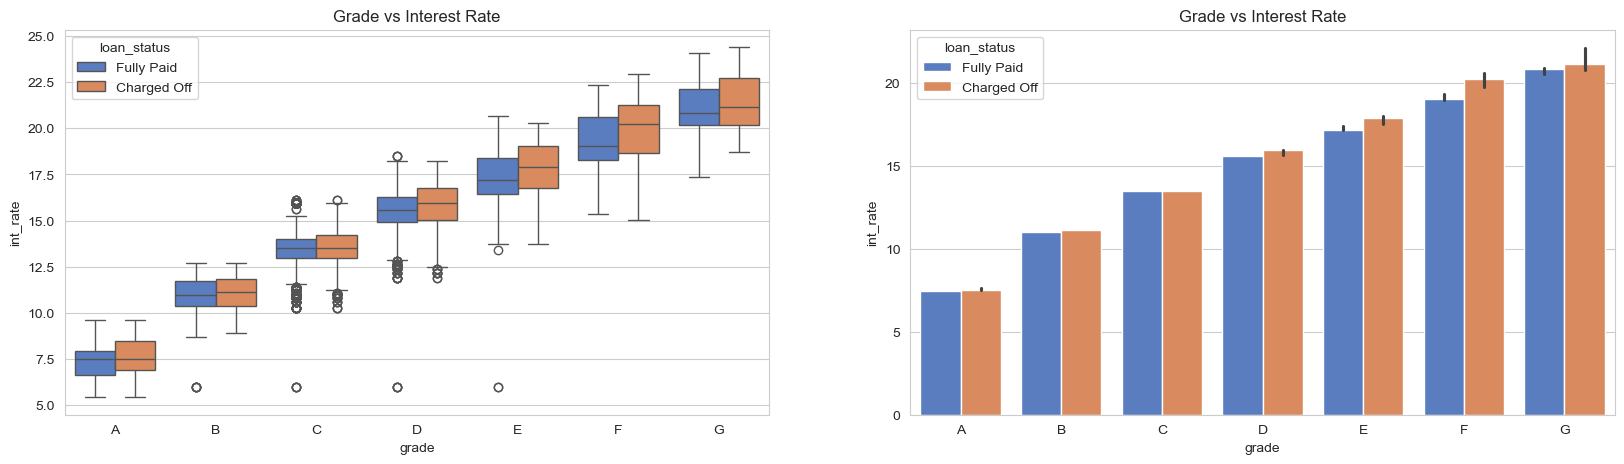

In [893]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='int_rate', hue='loan_status', data=lending_data, order = grade_ord, palette='muted')
plt.title('Grade vs Interest Rate')
plt.subplot(122)
sns.barplot(x='grade', y='int_rate', hue='loan_status', data=lending_data, order = grade_ord, estimator=np.median, palette='muted')
plt.title('Grade vs Interest Rate')
plt.show()

**Observation** <br>
Interest rates rises as grade decreases <br>
Interest rate does not impact if borrower will default, as we see even higher interest rate we have equal distribution for defaulter and fully paid loan

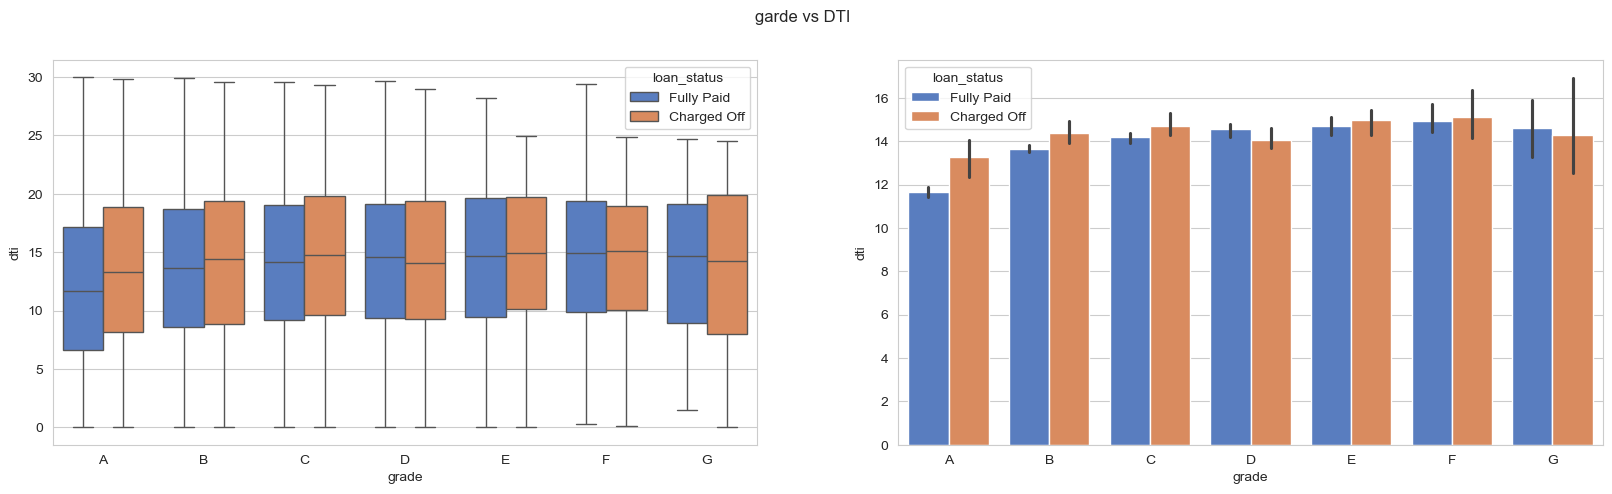

In [894]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='dti', hue='loan_status', data=lending_data, order=grade_ord, palette='muted')
plt.subplot(122)
sns.barplot(x='grade', y='dti', hue='loan_status', data=lending_data, estimator=np.median, order = grade_ord, palette='muted')
plt.suptitle('garde vs DTI')
plt.show()

**Observation** <br>
We see that dti does not determine whether borrower will default or not.

Text(0.5, 1.0, 'Grade vs Loan Status')

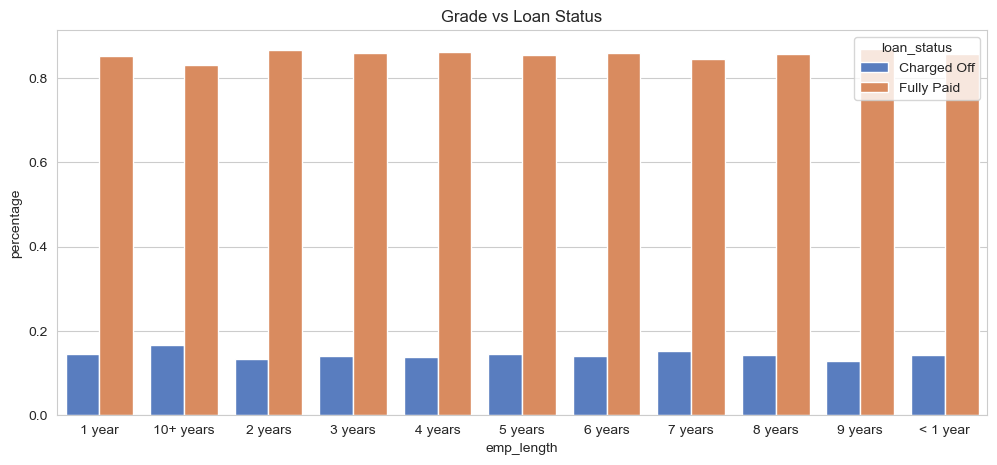

In [895]:
df = lending_data.groupby(['emp_length', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('emp_length')['id'].transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='emp_length', y='percentage', hue='loan_status', data=df, palette='muted')
plt.title('Grade vs Loan Status')

**Observation** No pattern is observed

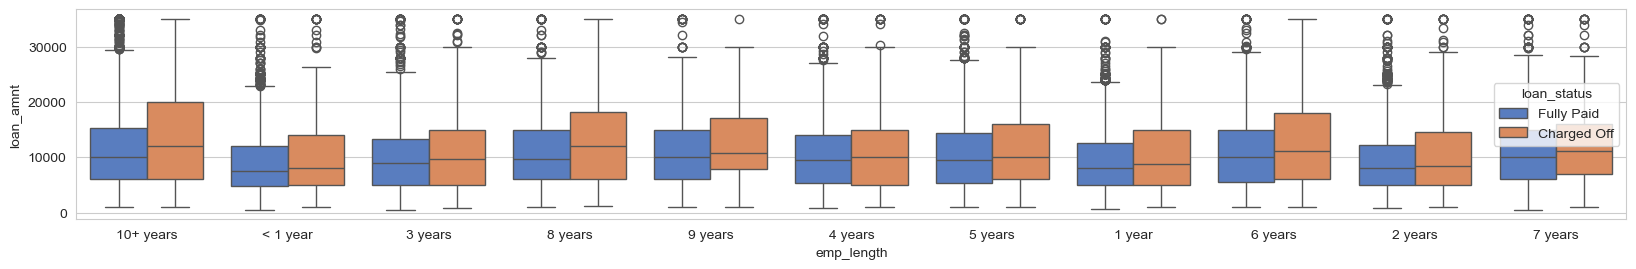

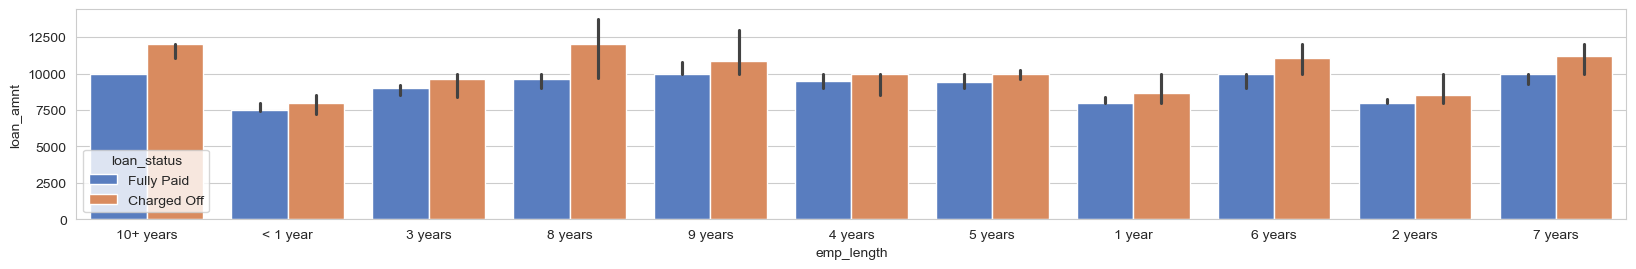

In [896]:
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x='emp_length', y='loan_amnt', hue='loan_status', data=lending_data , palette='muted')
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status', data=lending_data, estimator=np.median, palette='muted')
plt.show()

**Observation** <br>
We conclude that people with more experience took more loan and also have defaulted more

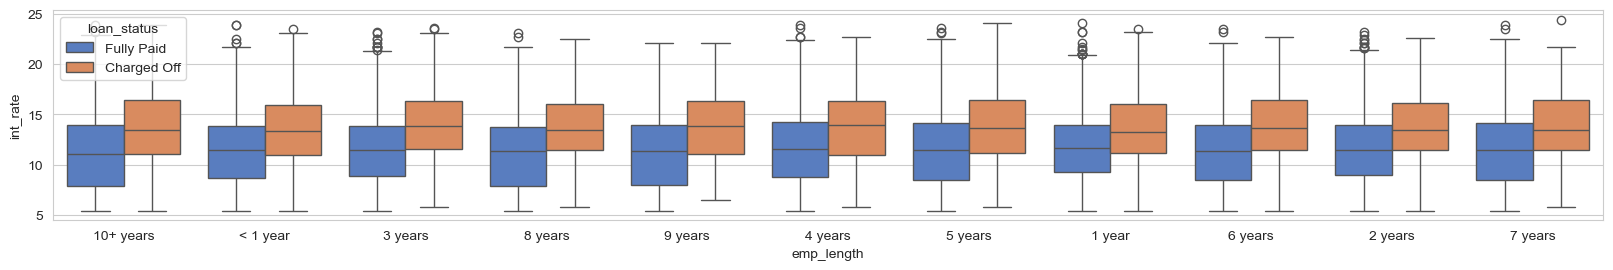

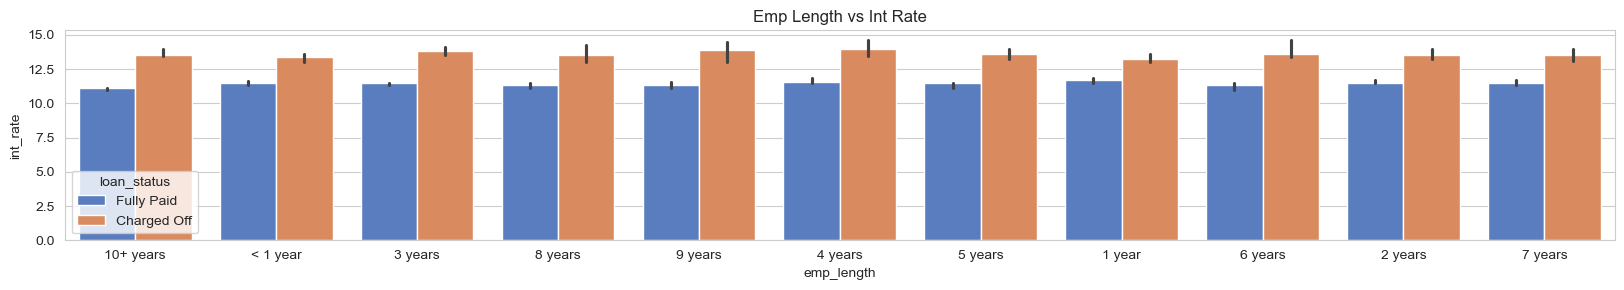

In [897]:
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x='emp_length', y='int_rate', hue='loan_status', data=lending_data, palette='muted')
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.barplot(x='emp_length', y='int_rate', hue='loan_status', data=lending_data, estimator=np.median, palette='muted')
plt.title('Emp Length vs Int Rate')
plt.show()

**Observations** <br>
We can conclude that loans with high interest rates defaulted and does not rely on employment length

Text(0.5, 1.0, 'Home Ownership vs Loan status')

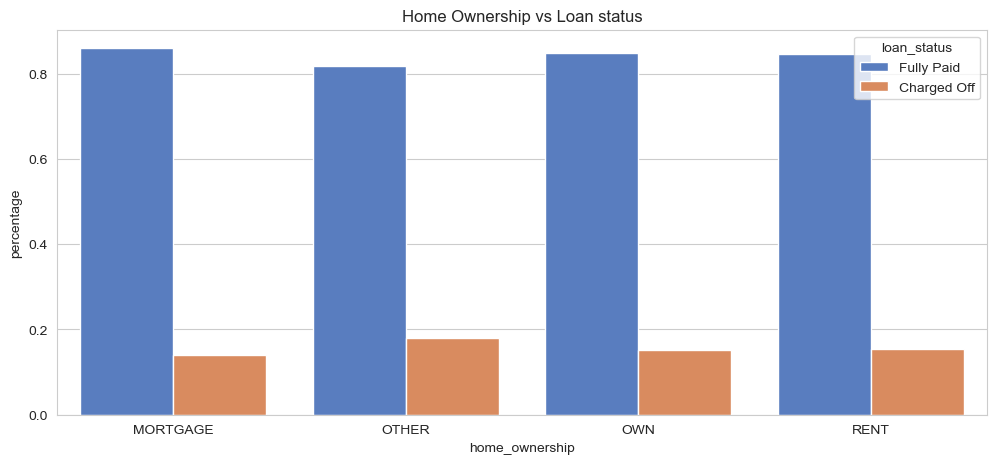

In [898]:
df = lending_data.groupby(['home_ownership', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('home_ownership')['id'].transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='home_ownership', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'], palette='muted')
plt.title('Home Ownership vs Loan status')

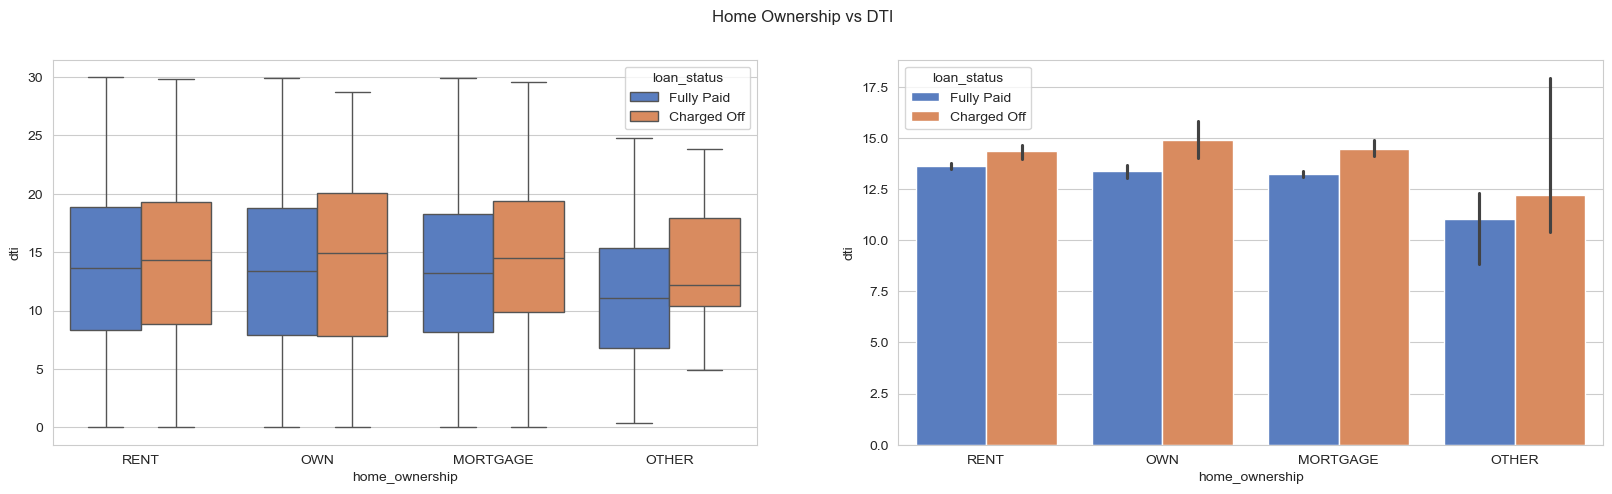

In [899]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='dti', hue='loan_status', data=lending_data, palette='muted')
plt.subplot(122)
sns.barplot(x='home_ownership', y='dti', hue='loan_status', data=lending_data, estimator=np.median, palette='muted')
plt.suptitle('Home Ownership vs DTI')
plt.show()

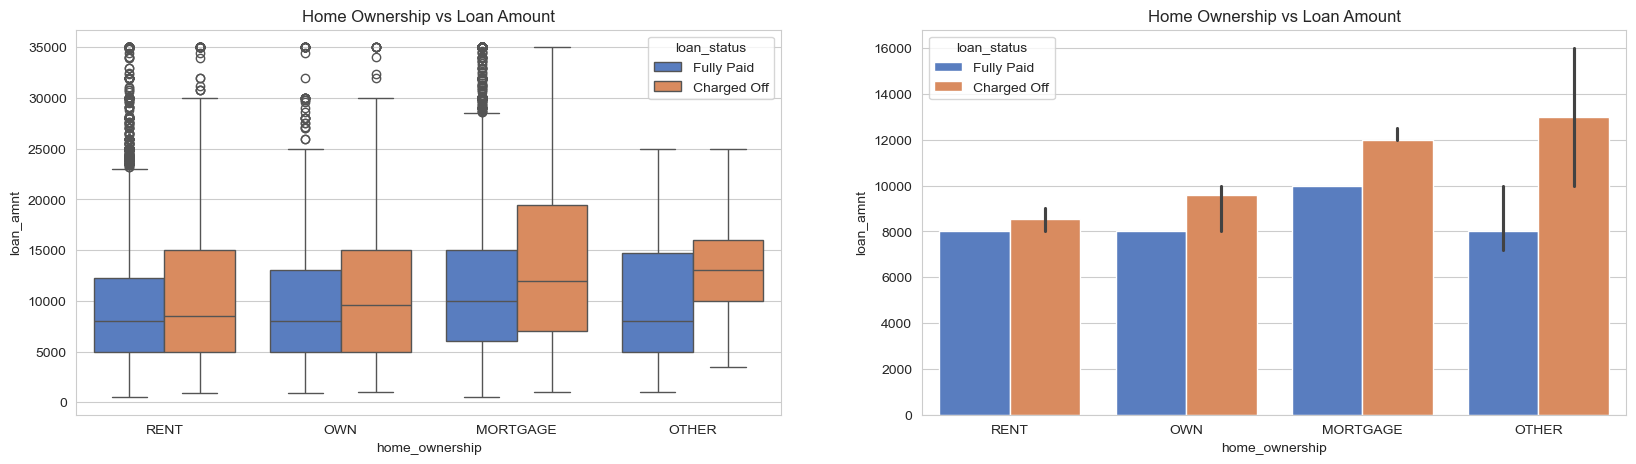

In [900]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=lending_data, palette='muted')
plt.title('Home Ownership vs Loan Amount')
plt.subplot(122)
sns.barplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=lending_data, estimator=np.median, palette='muted')
plt.title('Home Ownership vs Loan Amount')
plt.show()

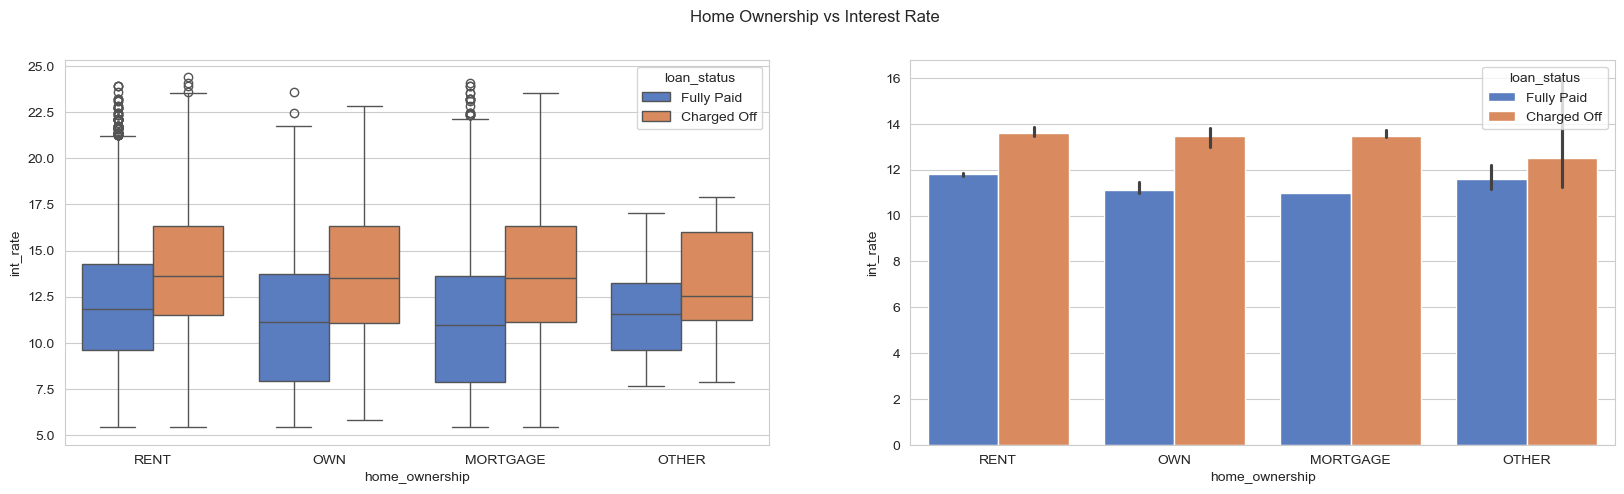

In [901]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='int_rate', hue='loan_status', data=lending_data, palette='muted')
plt.subplot(122)
sns.barplot(x='home_ownership', y='int_rate', hue='loan_status', data=lending_data, estimator=np.median, palette='muted')
plt.suptitle('Home Ownership vs Interest Rate')
plt.show()

**Observation** <br>
 - More loans are defaulted by borrower with home ownership havign OTHER <br>
 - DTI VS Homeownership has not impact on being a defaulter <br>
 - Higher the loan amount higher the chances of defaulting, irrespective of home ownership
 - Higher interest rate means more chances of defaulting, irrespecitive of home ownerhship

Text(0.5, 1.0, 'Verification Status vs Loan status')

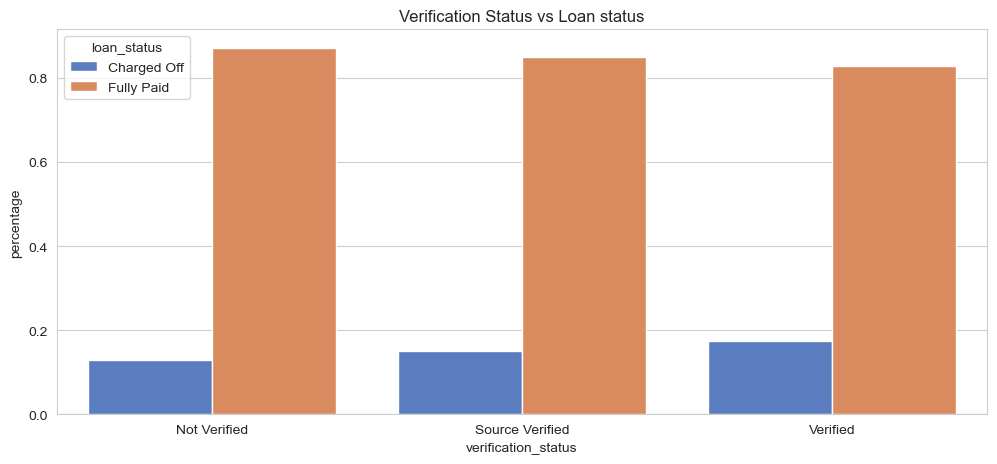

In [902]:
df = lending_data.groupby(['verification_status', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('verification_status')['id'].transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='verification_status', y='percentage', hue='loan_status', data=df, palette='muted')
plt.title('Verification Status vs Loan status')

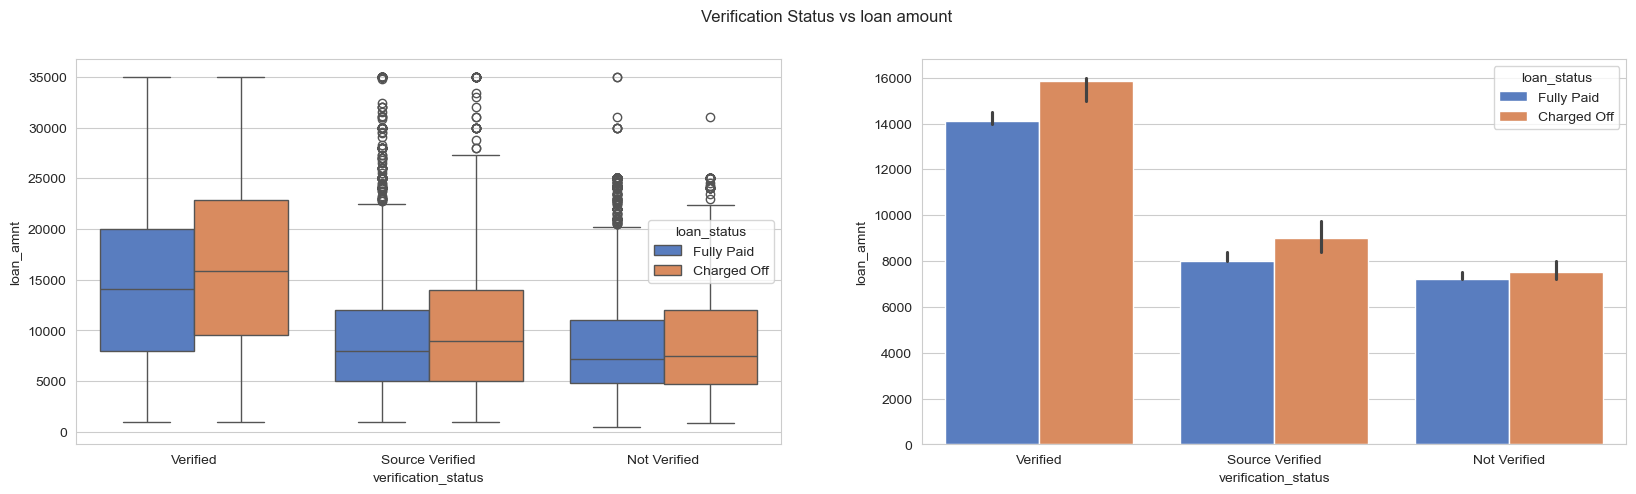

In [903]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='loan_amnt', hue='loan_status', data=lending_data, palette='muted')
plt.subplot(122)
sns.barplot(x='verification_status', y='loan_amnt', hue='loan_status', data=lending_data, estimator=np.median, palette='muted')
plt.suptitle('Verification Status vs loan amount')
plt.show()

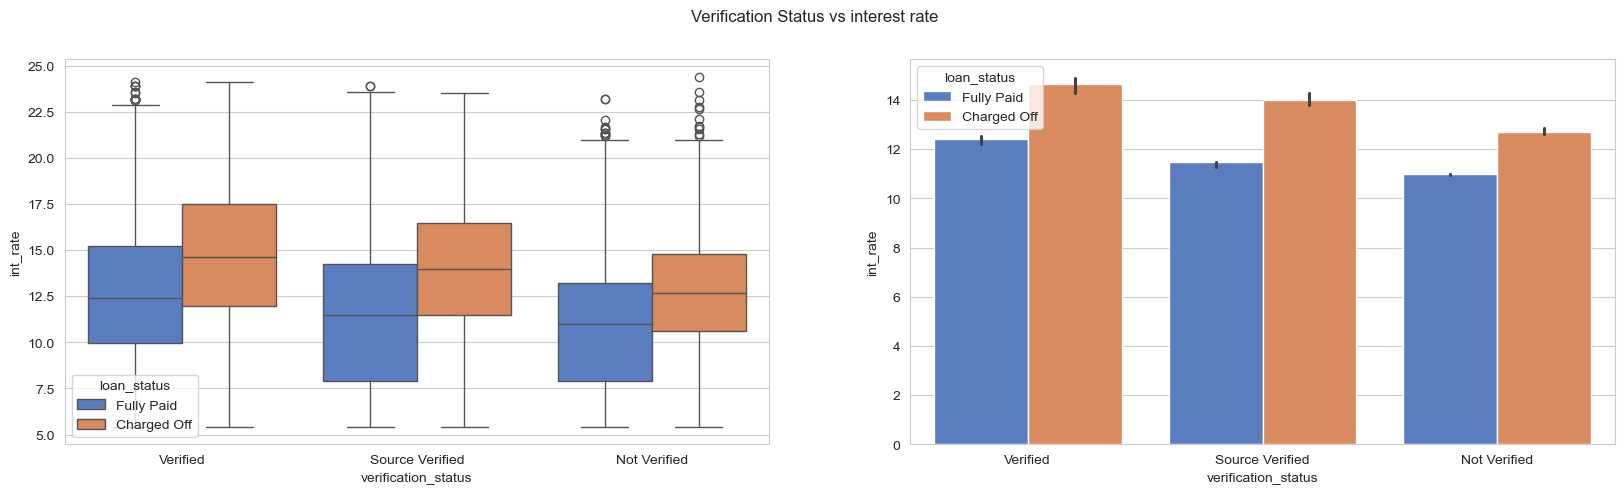

In [904]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='int_rate', hue='loan_status', data=lending_data, palette='muted')
plt.subplot(122)
sns.barplot(x='verification_status', y='int_rate', hue='loan_status', data=lending_data, estimator=np.median, palette='muted')
plt.suptitle('Verification Status vs interest rate')
plt.show()

**Observation** <br>
 - We see that huge number of loans are being defaulted irrespective of verification status
 - Loan amount for verified users is more than other any other verification status. However, fully paid : defaulter ratio is almost similar for respective verification status

Text(0.5, 1.0, 'Purpose vs Loan status (Charged Off)')

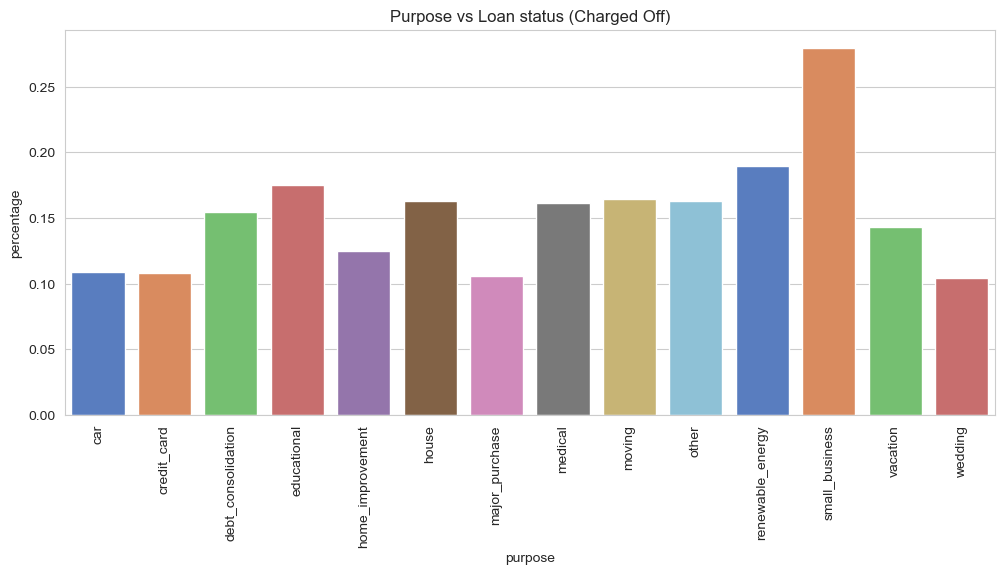

In [906]:
df = lending_data.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('purpose')['id'].transform(lambda x: x/x.sum())
df = df[df.loan_status == 'Charged Off']
plt.figure(figsize=(12,5))
sns.barplot(x='purpose', y='percentage', data=df, palette='muted')
plt.xticks(rotation=90)
plt.title('Purpose vs Loan status (Charged Off)')

<Figure size 640x480 with 0 Axes>

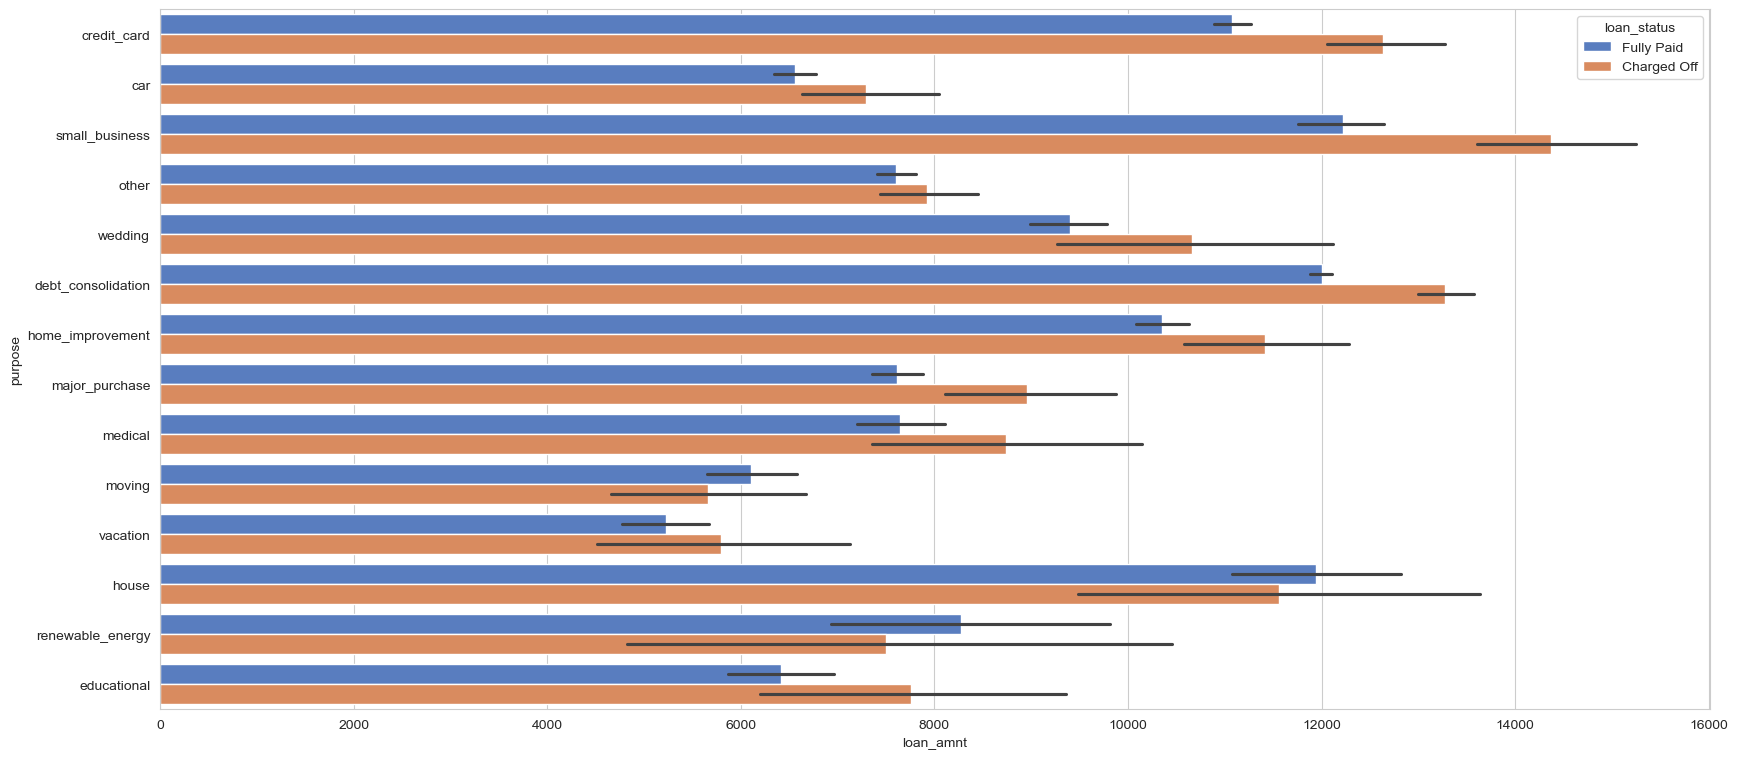

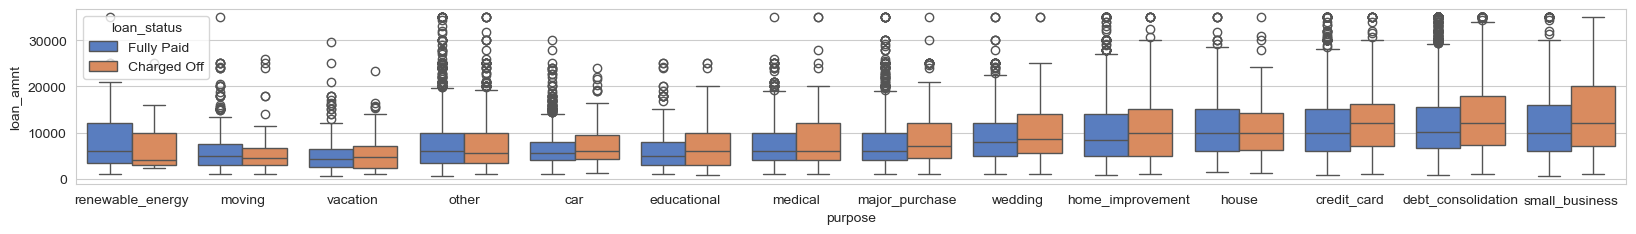

In [946]:
df = lending_data.groupby(['purpose', 'loan_status'], as_index=False)['loan_amnt'].median()

plt.suptitle('Purpose vs Loan Amount')
plt.figure(figsize=(20,20))
plt.subplot(211)
sns.barplot(data =lending_data,x='loan_amnt', y='purpose', hue ='loan_status',palette="muted")
plt.show()

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data= lending_data, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose, palette='muted')
plt.show()

<Figure size 640x480 with 0 Axes>

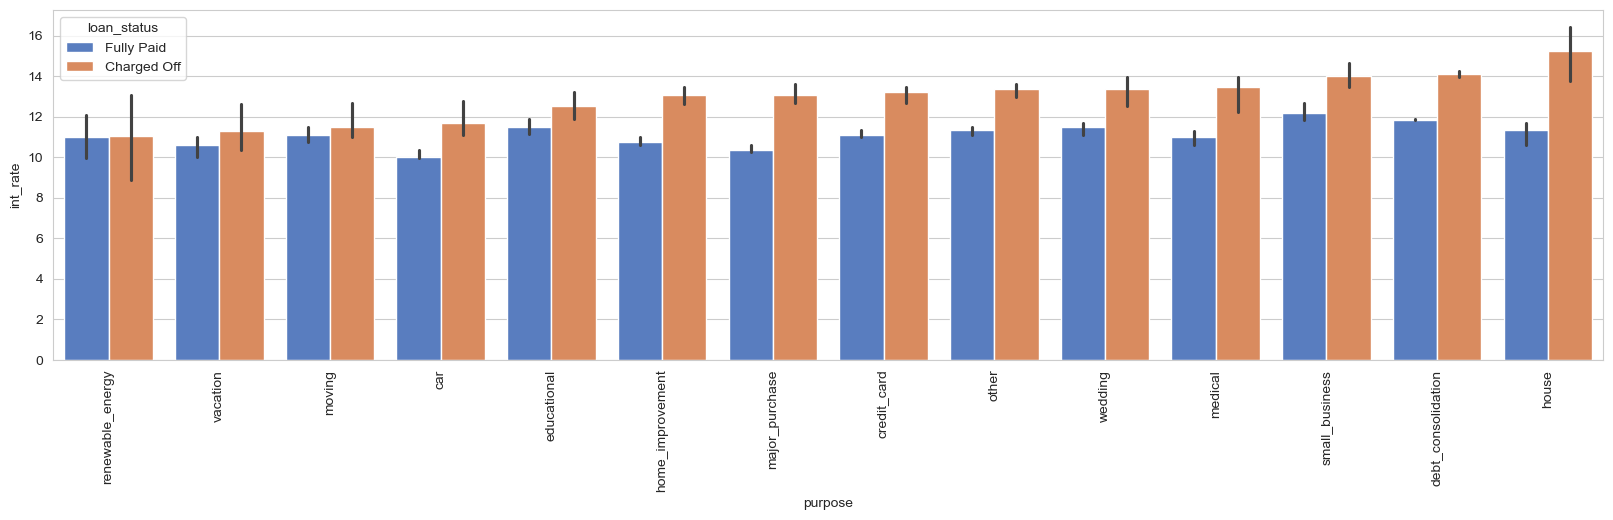

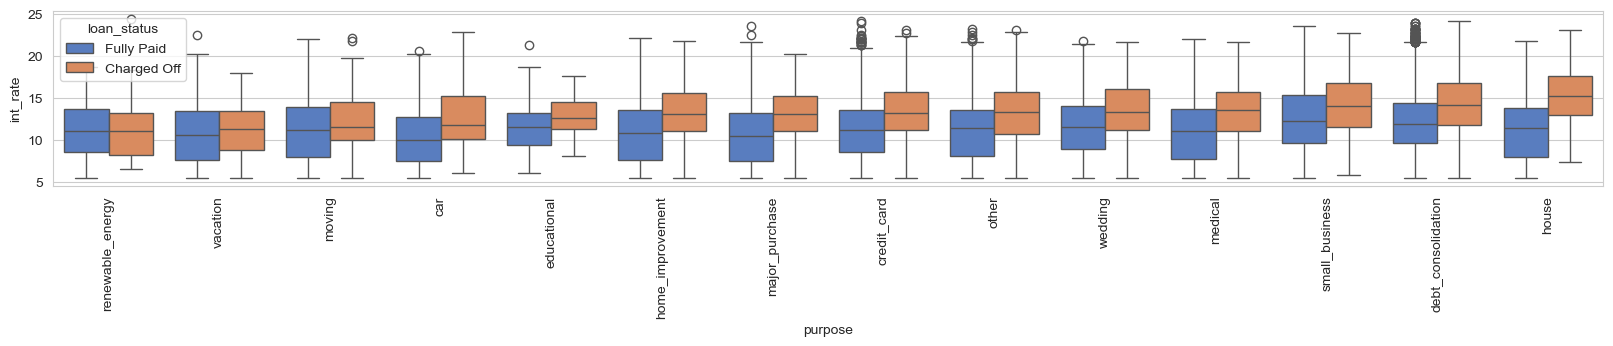

In [940]:
df = lending_data.groupby(['purpose', 'loan_status'], as_index=False)['int_rate'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='int_rate').purpose

plt.suptitle('Purpose vs interest rate')
plt.figure(figsize=(20,10))
plt.subplot(211)
sns.barplot(x='purpose', y='int_rate', hue='loan_status', data= lending_data, estimator=np.median, order = purpose_ord, palette='muted')
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='int_rate', hue='loan_status', data= lending_data, order = purpose_ord, palette='muted')
plt.xticks(rotation=90)
plt.show()

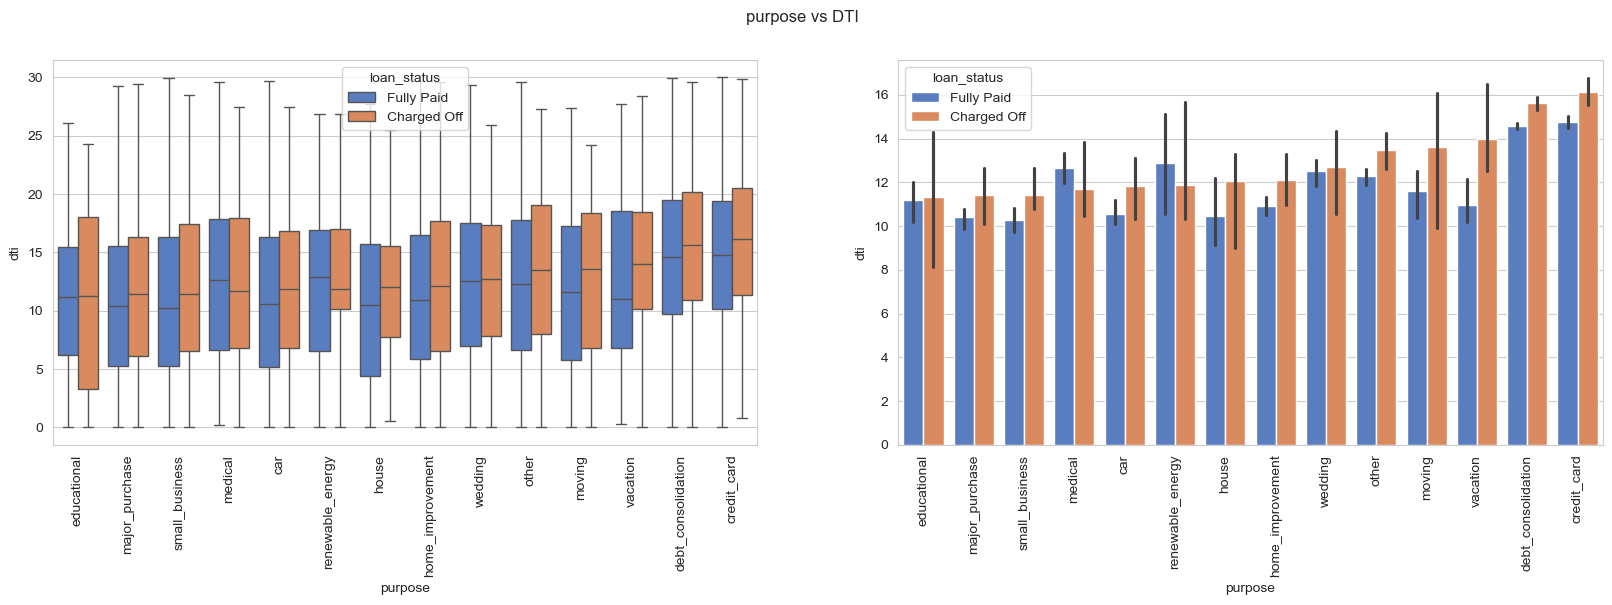

In [909]:
df = lending_data.groupby(['purpose', 'loan_status'], as_index=False)['dti'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='dti').purpose

plt.figure(figsize=(20,5))
plt.suptitle('purpose vs DTI')
plt.subplot(121)
sns.boxplot(x='purpose', y='dti', hue='loan_status', data=lending_data, order=purpose_ord, palette='muted')
plt.xticks(rotation=90)
plt.subplot(122)
sns.barplot(x='purpose', y='dti', hue='loan_status', data=lending_data, estimator=np.median, order = purpose_ord, palette='muted')
plt.xticks(rotation=90)
plt.show()

**Observation** <br>
 - Small business take high loan amount and are more likely to default <br>
 - Debt Consolidation are given at high interest rate and are prone to defaulting <br>
 - 

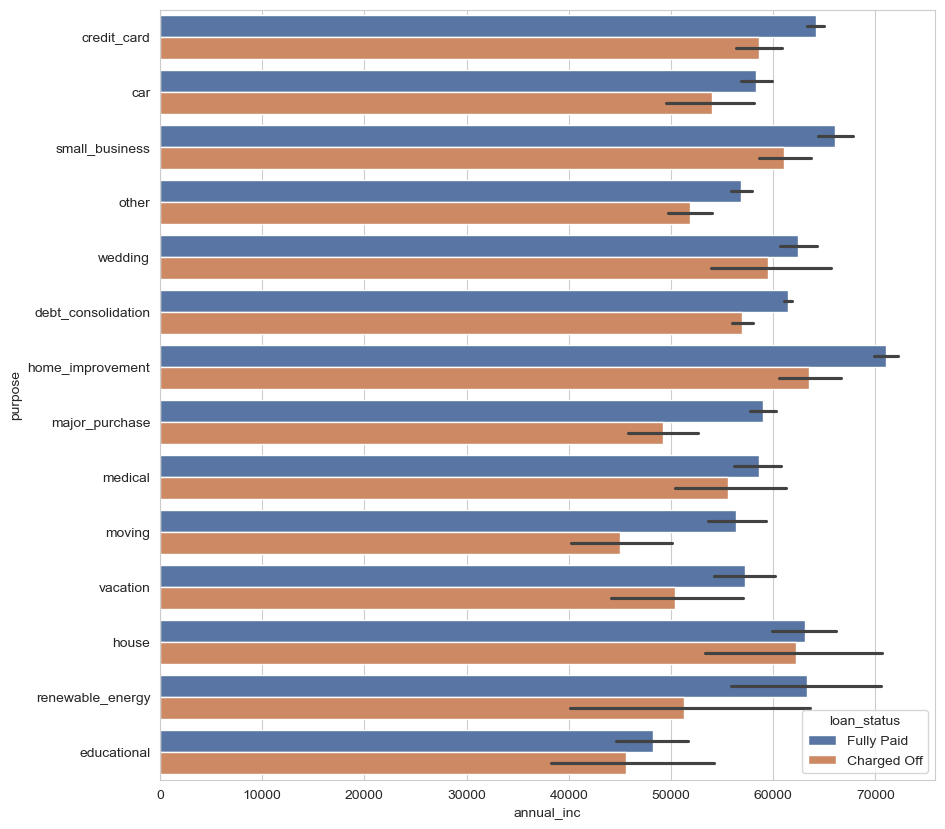

In [910]:
plt.figure(figsize=(10,10))
sns.barplot(data =lending_data,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
oplt.show()

**Observation** <br>
 - Borrower taking loan for house or house improvement or small business are likely to default. All of these have an annual income range of 60-70k 

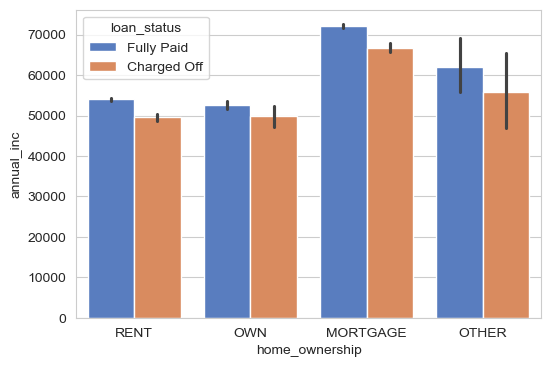

In [954]:
plt.figure(figsize=(6,4))
sns.barplot(data =lending_data,x='home_ownership', y='annual_inc', hue ='loan_status', palette='muted')
plt.show()

**Observation** <br>
 - We observe that borrowers having Mortgage are having annual salary in range of 60-70k and re more likely to default

<Axes: xlabel='annual_inc_groups', ylabel='loan_amnt'>

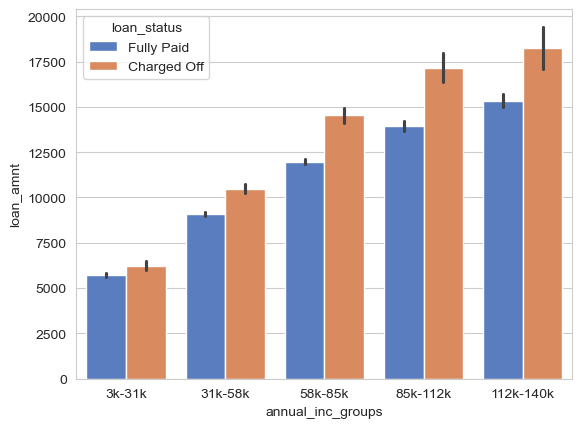

In [912]:
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = lending_data, palette='muted')

**Observation** <br>
 - Higher the annual income, more loan amount is granted and they are more likely to default.
 - Borrowers having income in range of 85k-140k given loans in range of 16-18k are more prone to defaulting

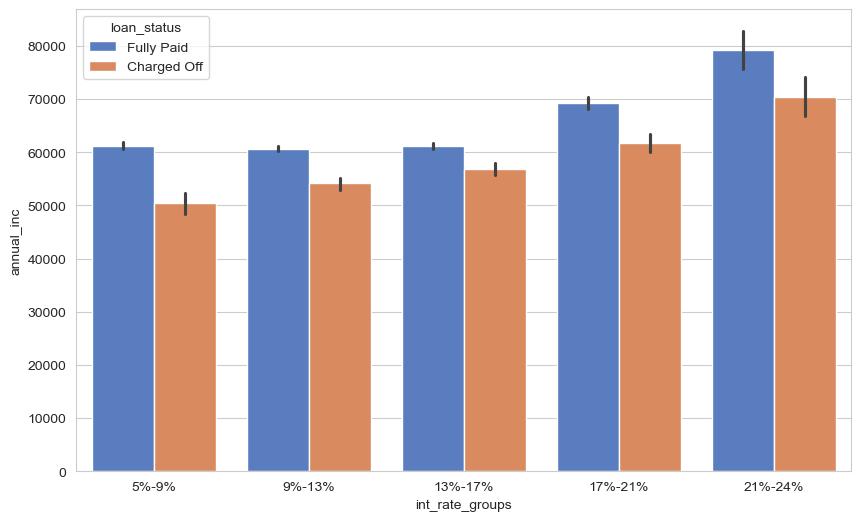

In [950]:
plt.figure(figsize=(10,6))
sns.barplot(data =lending_data,x='int_rate_groups', y='annual_inc', hue ='loan_status', palette='muted')
plt.show()

**Observation** <br>
 - Higher income groups are charged high interest rate and borrower having salary range of 60-70k have defaulted

<Axes: xlabel='issue_d_year', ylabel='loan_amnt'>

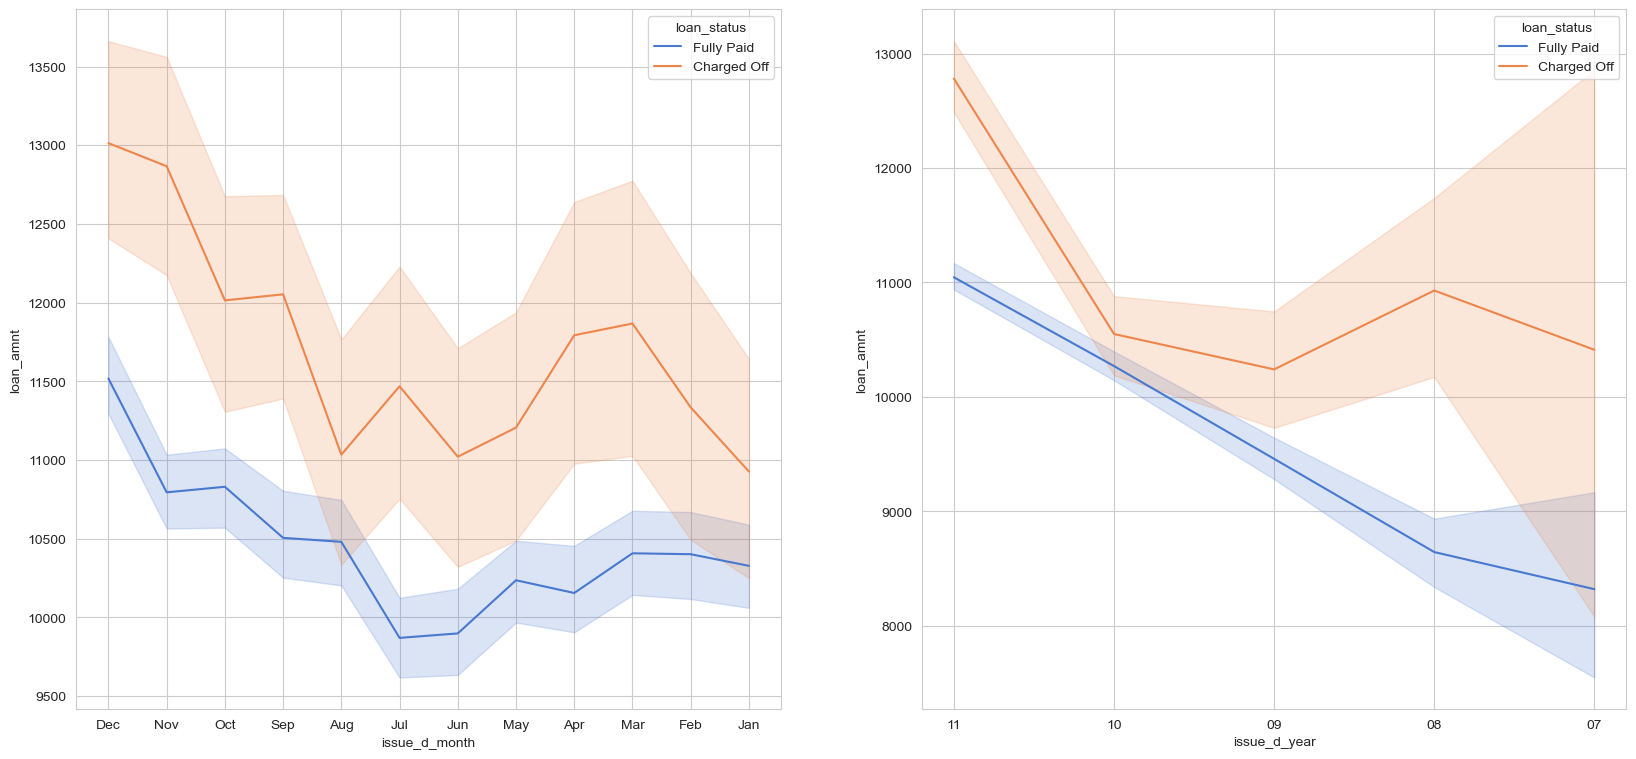

In [933]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =lending_data,y='loan_amnt', x='issue_d_month', hue ='loan_status',palette="muted")
plt.subplot(222)
sns.lineplot(data =lending_data,y='loan_amnt', x='issue_d_year', hue ='loan_status',palette="muted")

**Observation** <br>
 - In year 2011, Loan amount > 11.5k when granted in month of december results in more defaults <br>
 - Year on year as loan amount increases default rate also increases

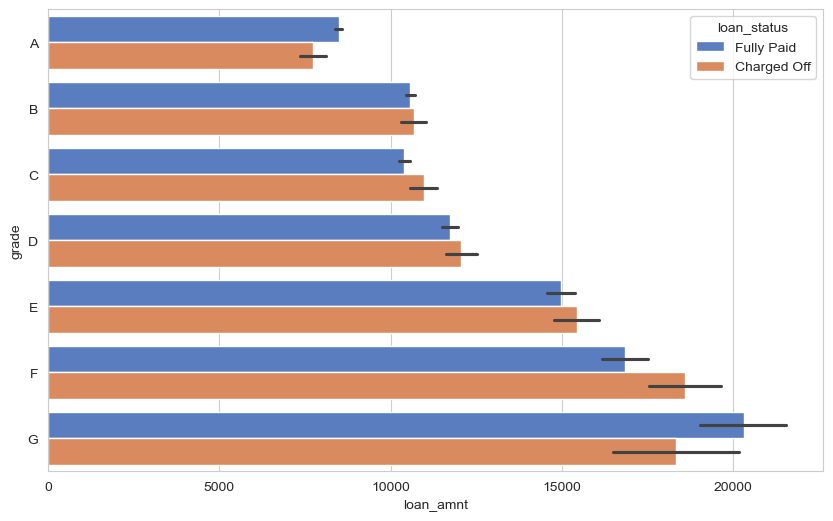

In [952]:
plt.figure(figsize=(10,6))
sns.barplot(data =lending_data,x='loan_amnt', y='grade', hue ='loan_status',palette="muted", order=['A','B','C','D','E','F','G'])
plt.show()

**Observation** <br>
 - Loans given to grades F and G have high default rate

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

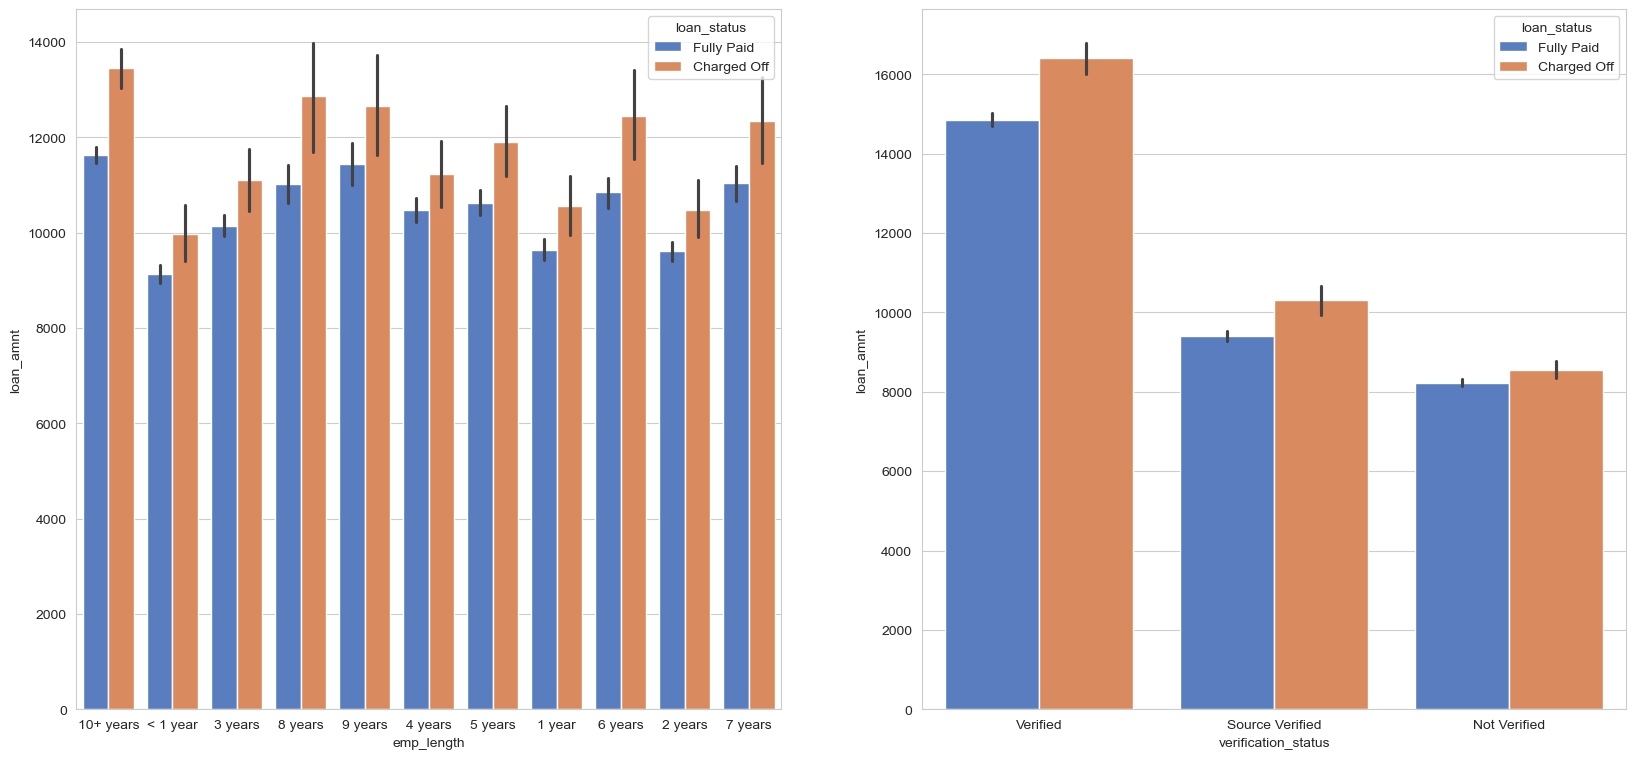

In [926]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =lending_data,y='loan_amnt', x='emp_length', hue ='loan_status',palette="muted")
plt.subplot(222)
sns.barplot(data =lending_data,y='loan_amnt', x='verification_status', hue ='loan_status',palette="muted")


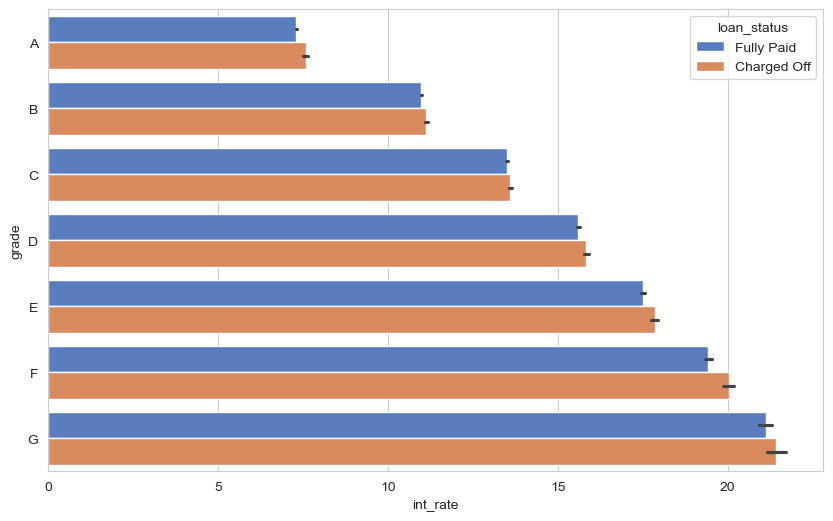

In [951]:
plt.figure(figsize=(10,6))
sns.barplot(data =lending_data,x='int_rate', y='grade', hue ='loan_status',palette="muted", order=['A','B','C','D','E','F','G'])
plt.show()

**Observation** <br>
 - Lower grades are charged high interest rates. <br>
 - Lower grades have high defaulter count

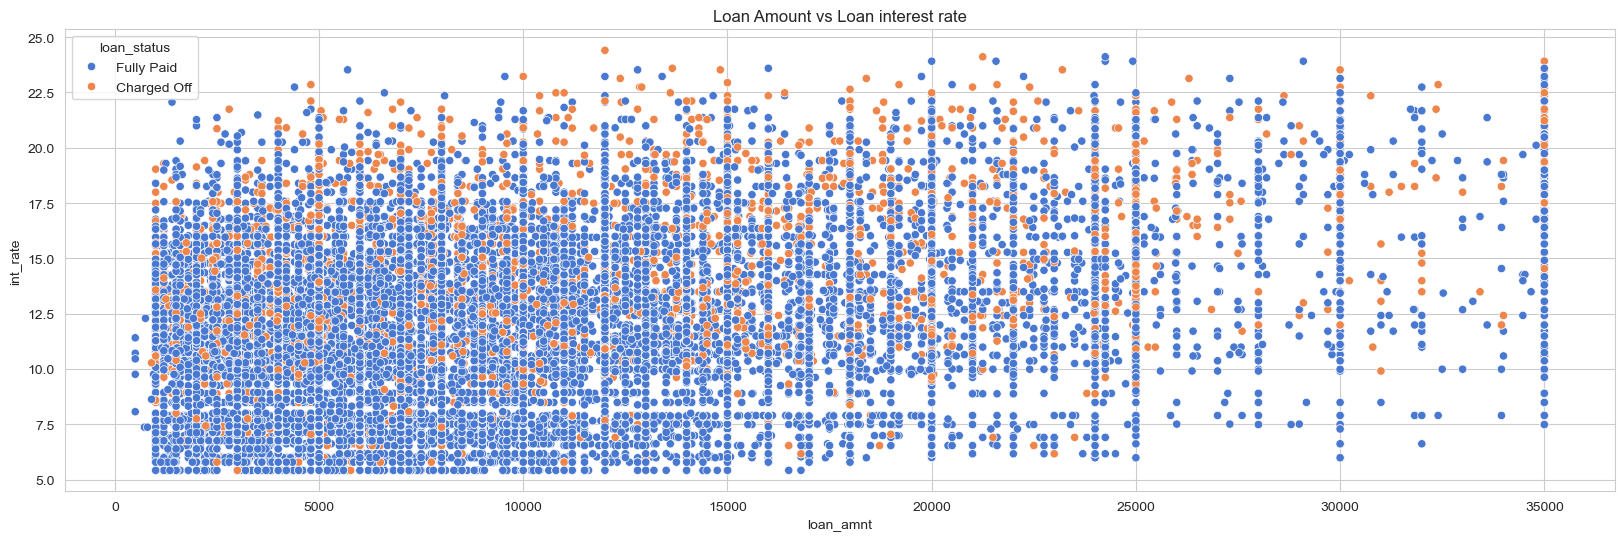

In [929]:
plt.figure(figsize=(20,6))
#scatter plot for analysing distribution
sns.scatterplot(x='loan_amnt', y='int_rate', data=lending_data, hue='loan_status', palette='muted')
plt.title('Loan Amount vs Loan interest rate')
plt.show()

**Observation** <br>
 - Irrespective of loan amount interest rate can vary as well as we cannot determine if borrower will default

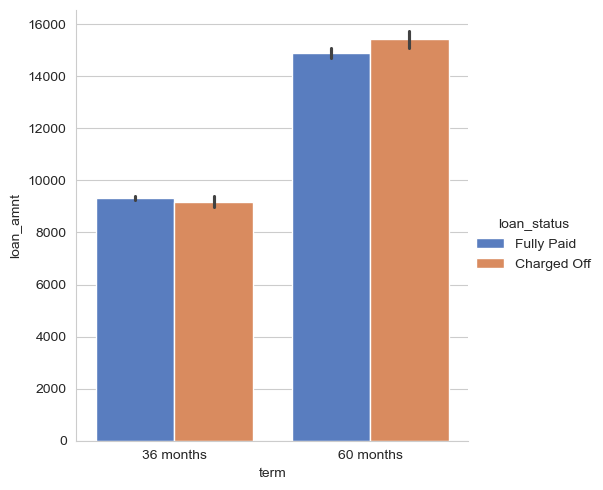

In [928]:
sns.catplot(x = 'term', y = 'loan_amnt', data = lending_data,hue = 'loan_status', kind = 'bar', palette='muted')

**Observation** <br>
 - Loan amount > 10k have term of 60 months have high default rate

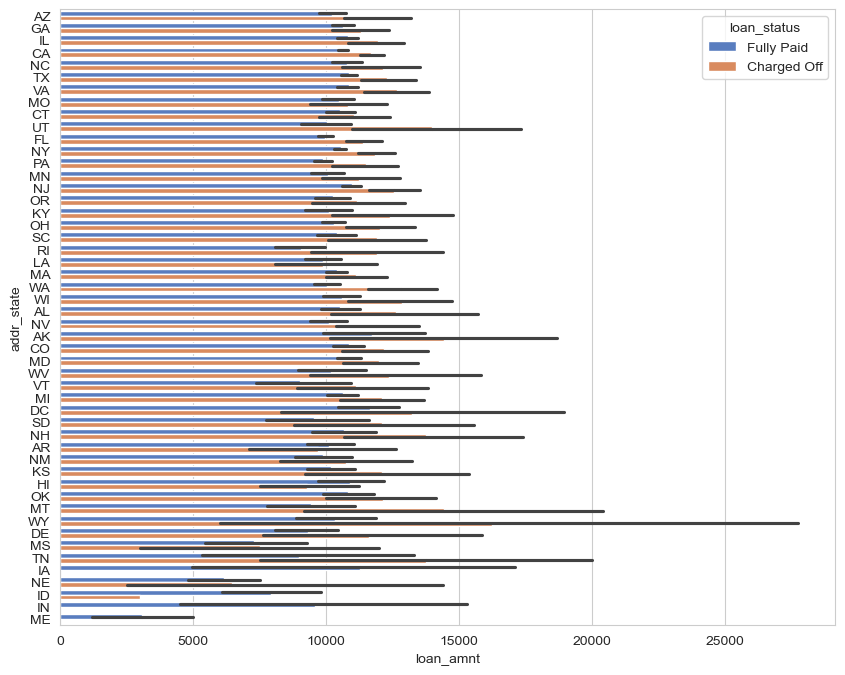

In [960]:
plt.figure(figsize=(10,8))
sns.barplot(data =lending_data,y='addr_state', x='loan_amnt', hue ='loan_status',palette="muted")
plt.show()

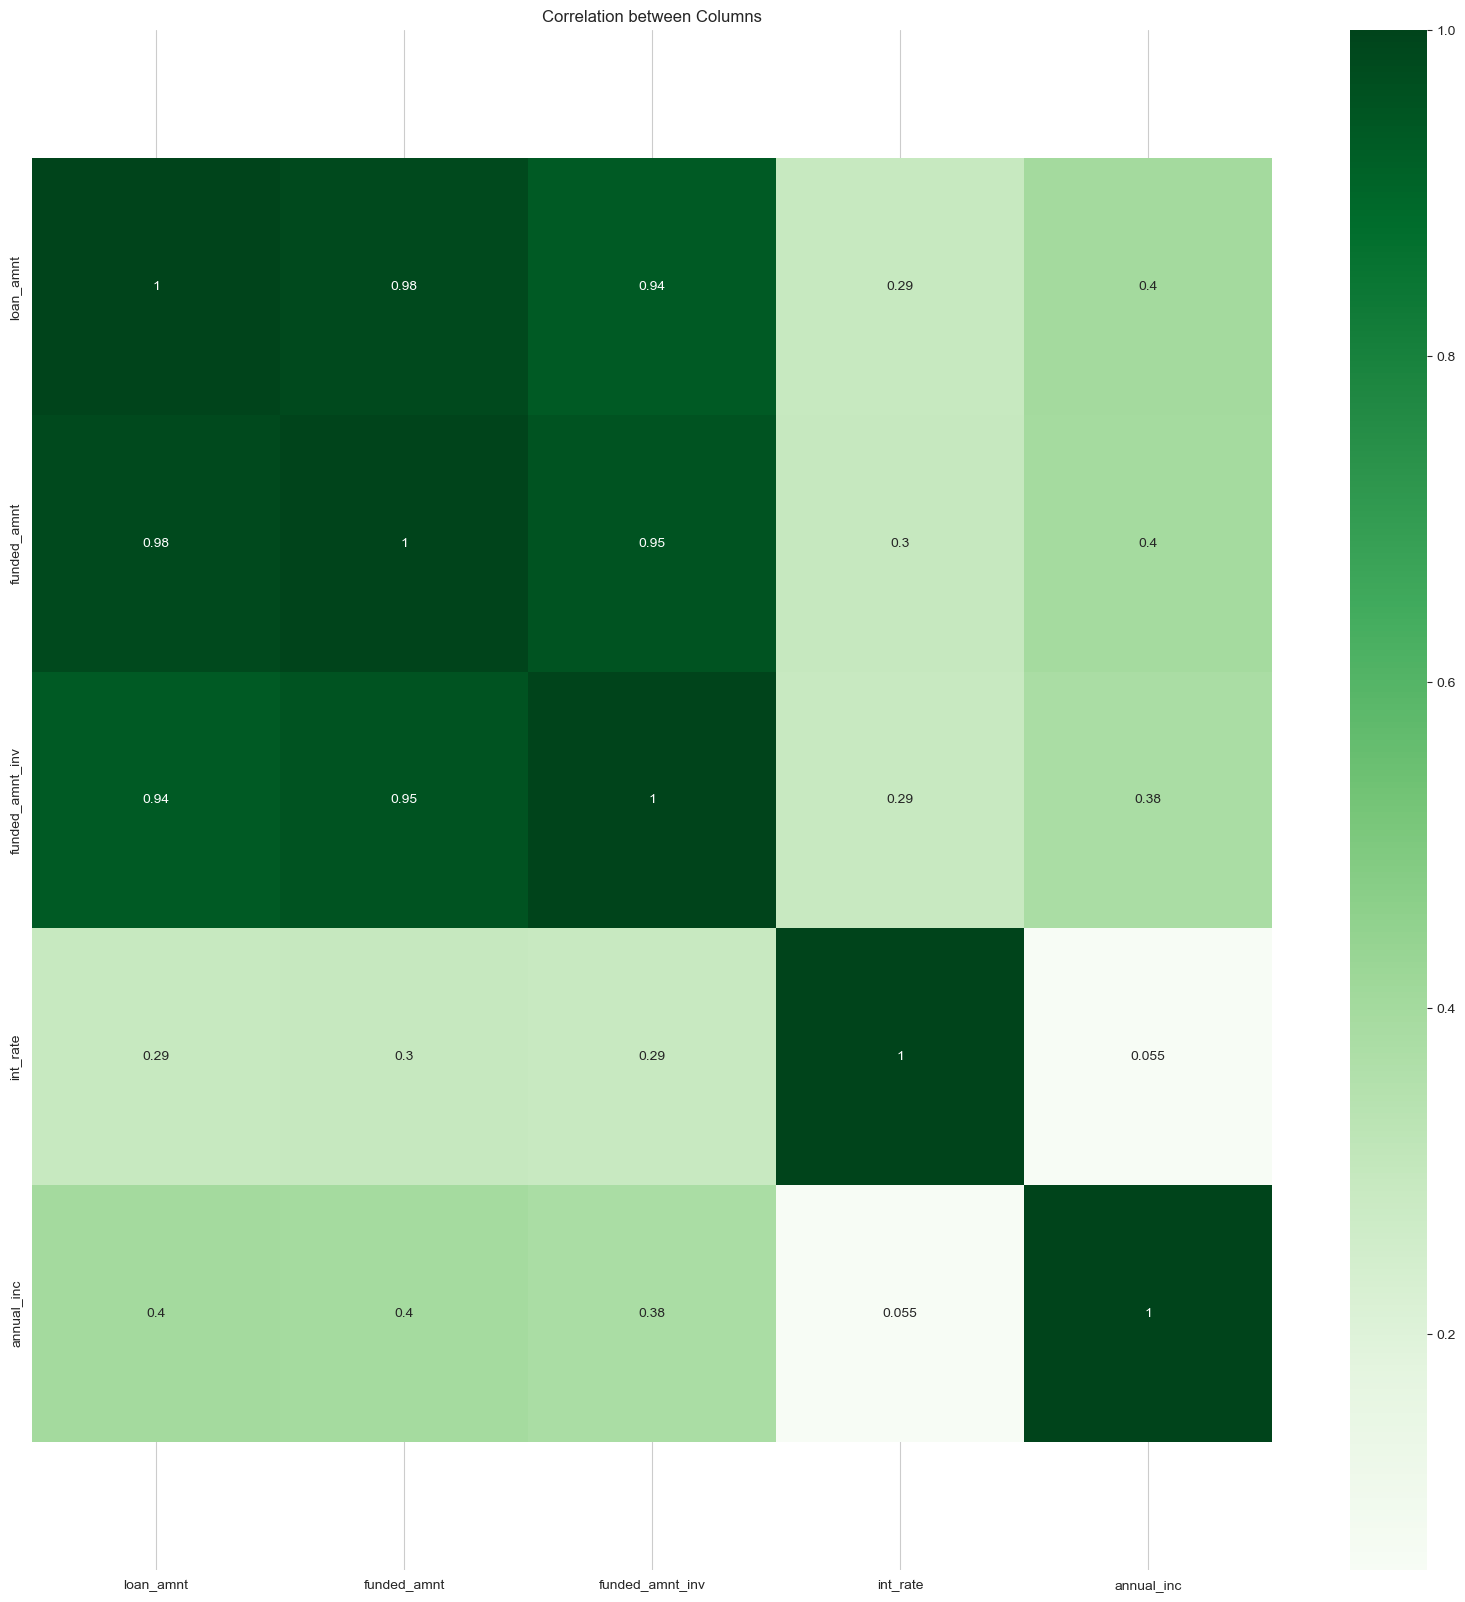

In [932]:
#Finding correlation matric
corr_matrix = lending_data[['loan_amnt','funded_amnt', 'funded_amnt_inv', 'int_rate', 'annual_inc']].corr()
plt.figure(figsize=(20,20))
#plotting correlatioon matric on a heat map
ax = sns.heatmap(corr_matrix, annot = True, cmap='Greens')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()

**Observation** <br>
 - There is high correlation between loan_amount, funded_amount and funded_amnt_inv which means that most of the loans were fully funded

# Observation

#### As per above analysis we can conclude that below are few scenarios which are more prone to default : <br>

 - Grades : Borrower with lower grades requesting for high loan amount
 - Home Ownership : Borrower whose home ownership is MORTGAGE and having income range of 60-70k
 - Purpose : If purpose of loan is for Small Business / Debt Consolidation (loan amount > 12k),  Home / House Improvement (loan amount > 10k) better to avoid granting these loans
 - Interest Rate : More defaults happened for high interest rate with tenure of 60 months. These types of loans need to be avoided or need more attention before it is granted
 - Loan Amount : Loan Amount >12k for tenure of 60 months requested by grades E, F, G
 - Loans which are verified and are granted loan amount >15k
 - Loans which are having high interest rate range of 15-18% for term of 60 months